In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import statsmodels.api as sm

In [100]:
df = pd.read_csv("/content/BankChurners.csv")

In [101]:
df.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender    Dependent_count  \
0  768805383  Existing Customer            45      M  3_Dependent_count   
1  818770008  Existing Customer            49      F  5_Dependent_count   
2  713982108  Existing Customer            51      M  3_Dependent_count   
3  769911858  Existing Customer            40      F  4_Dependent_count   
4  709106358  Existing Customer            40      M  3_Dependent_count   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...    Months_Inactive_12_mon    Contacts_Count_12_mon  \
0              39  ...  1_Months_Inactive_12_mon  3_Contacts_Count_12_mon   
1              44  ...  1_Months_Inactive_12_mon  2_Contacts_Count_12_mon   
2              36  ...  1_Months_Inactive_12_mon  0_Contacts_Count_12_mon   
3              34  ...  4_Months_Inactive_12_mon  1_Contacts_Count_12_mon   
4              21  ...  1_Months_Inactive_12_mon  0_Contacts_Count_12_mon   

  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0      12691.0                  777          11914.0                 1.335   
1       8256.0                  864           7392.0                 1.541   
2       3418.0                    0           3418.0                 2.594   
3       3313.0                 2517            796.0                 1.405   
4       4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  object 
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  object 
 11  Months_Inactive_12_mon    10127 non-null  object 
 12  Contacts_Count_12_mon     10127 non-null  object 
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<h1>Exploratory Analysis

<h3>Graph the distribution of individual features

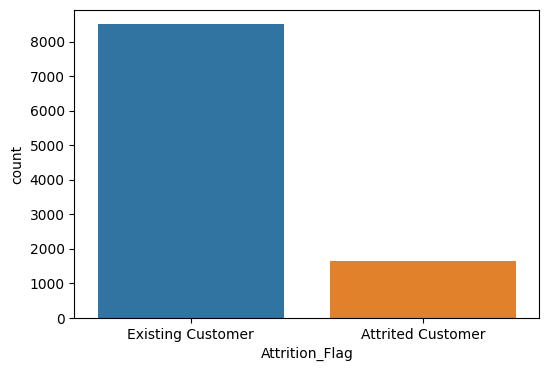

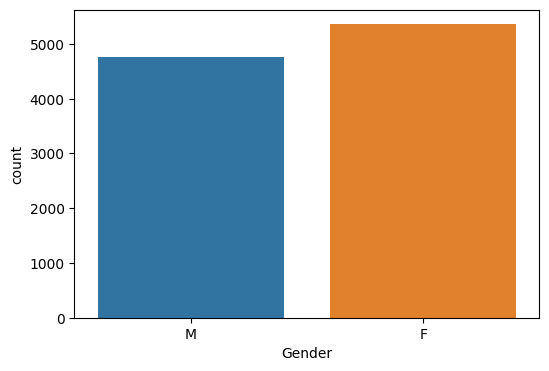

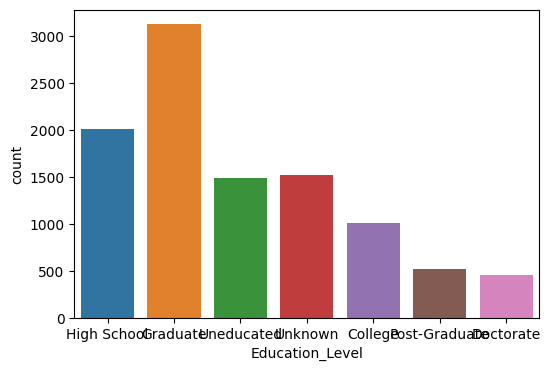

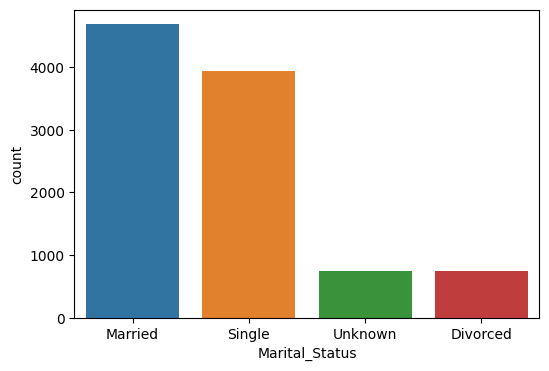

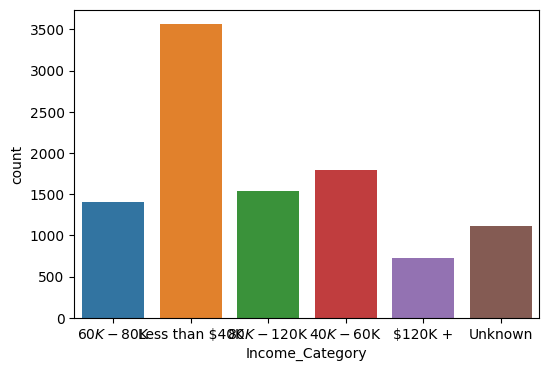

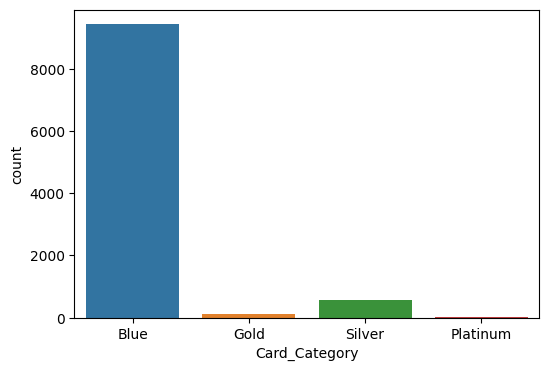

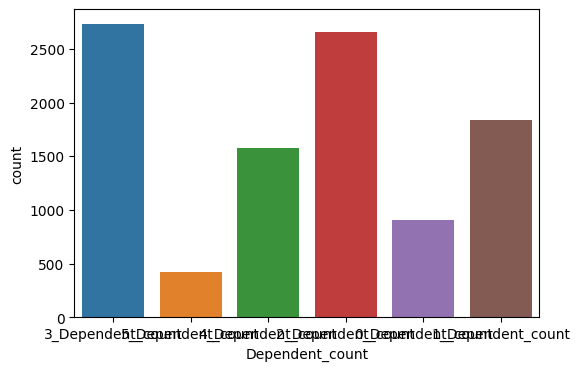

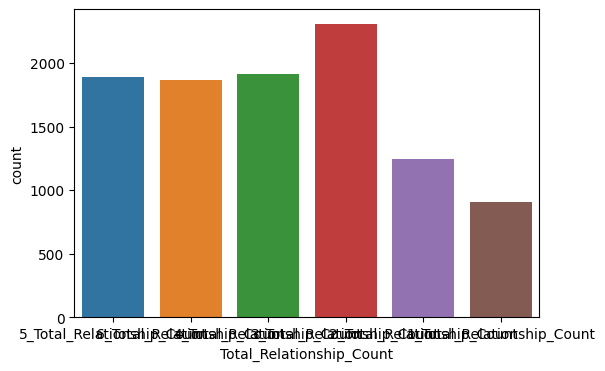

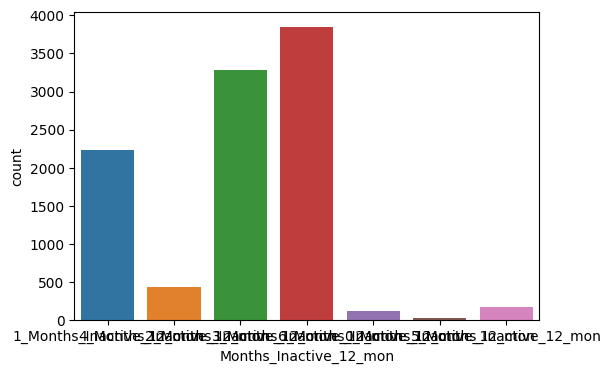

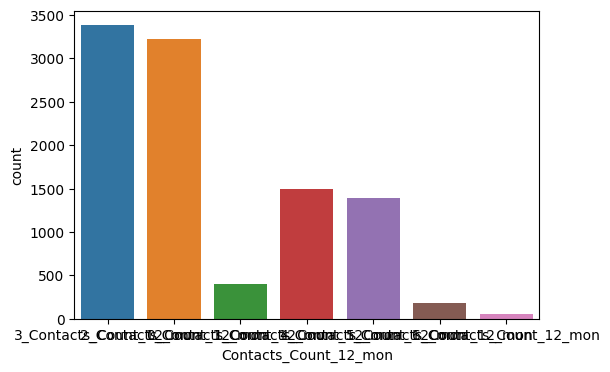

In [103]:
for col in ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']:
  plt.figure(figsize=[6,4])
  sns.countplot(data=df,
                x=col)

<h3>Relationship of categorical variables amongst each other

<ipython-input-104-26f208c83cfb>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=[6,4])


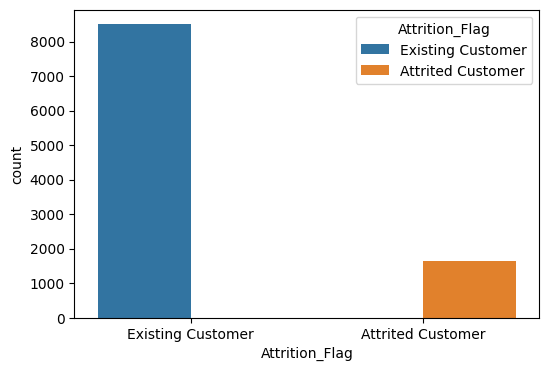

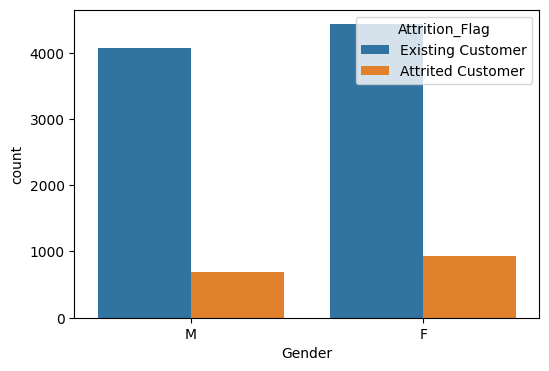

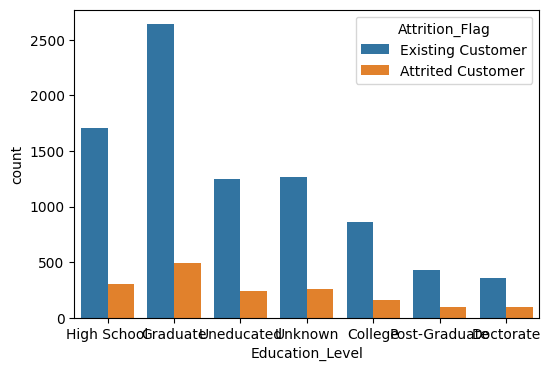

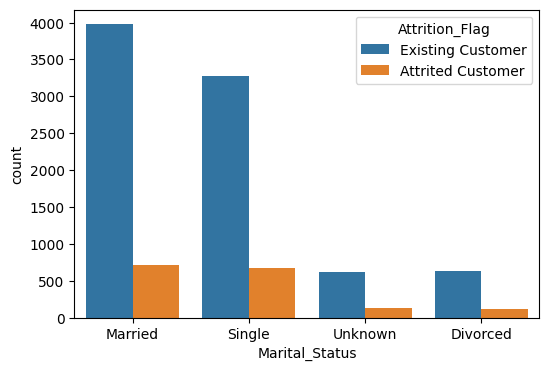

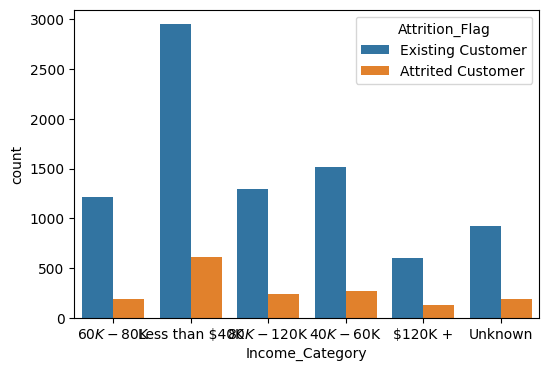

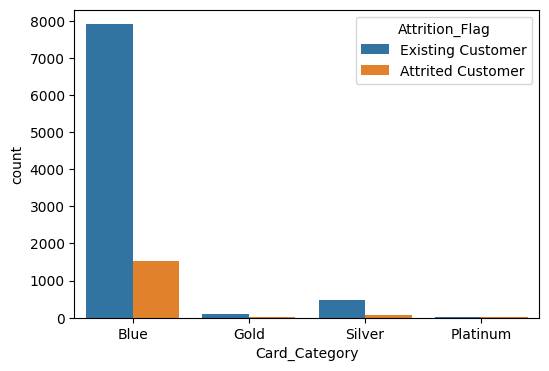

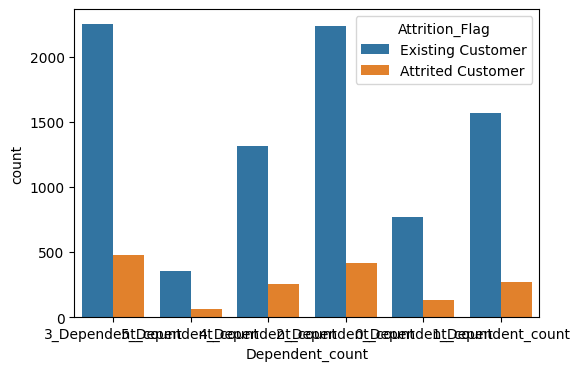

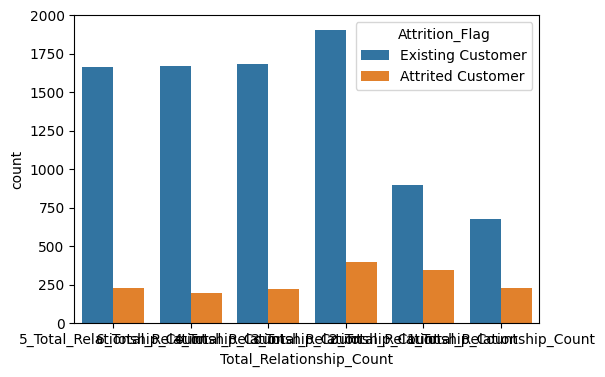

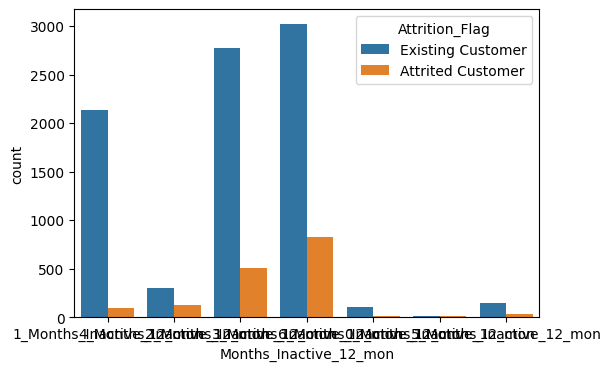

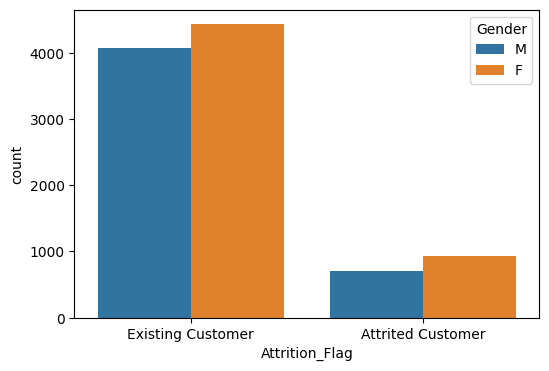

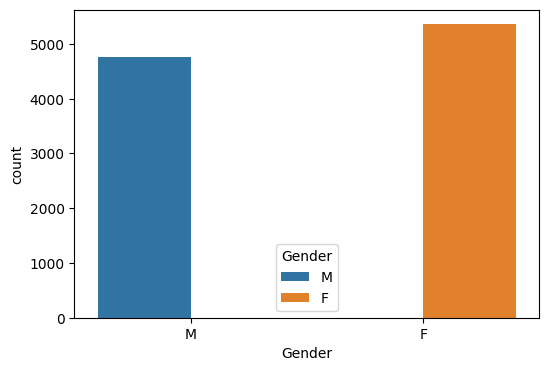

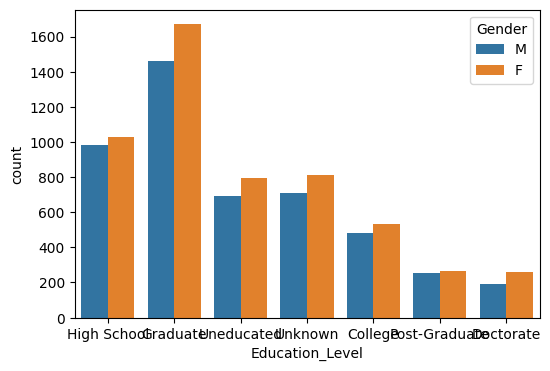

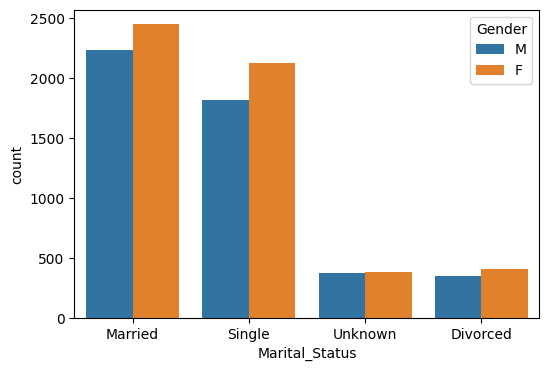

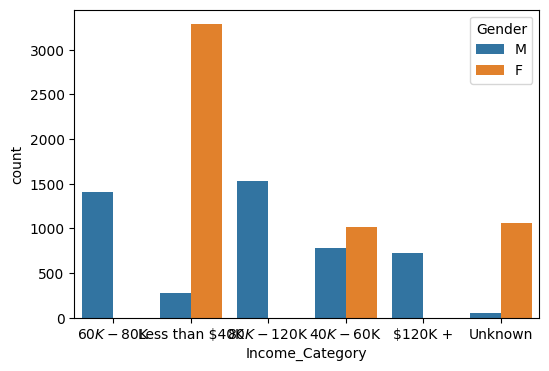

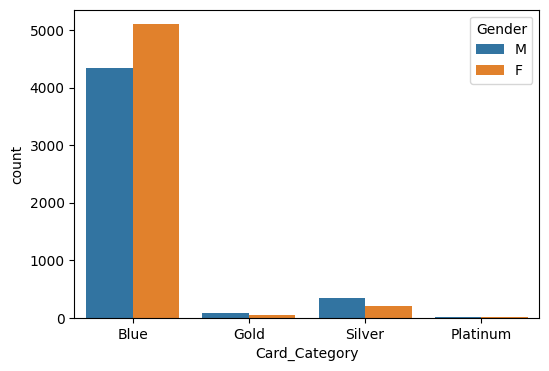

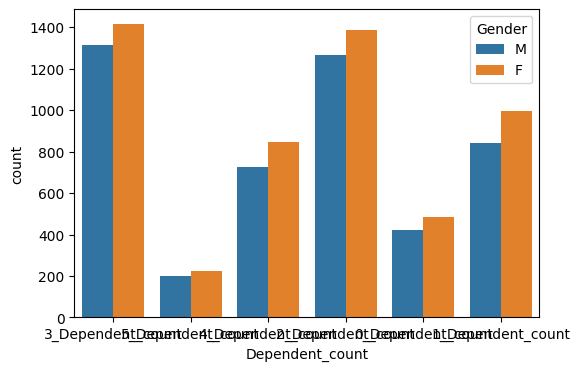

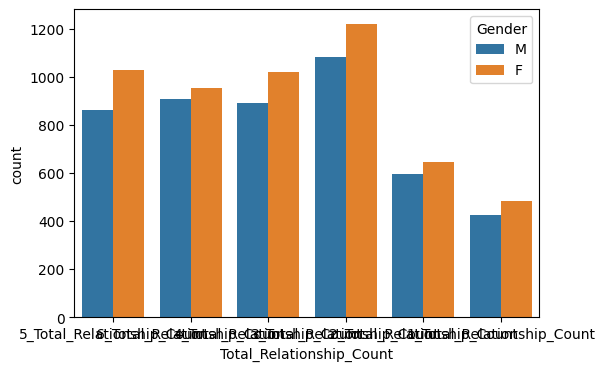

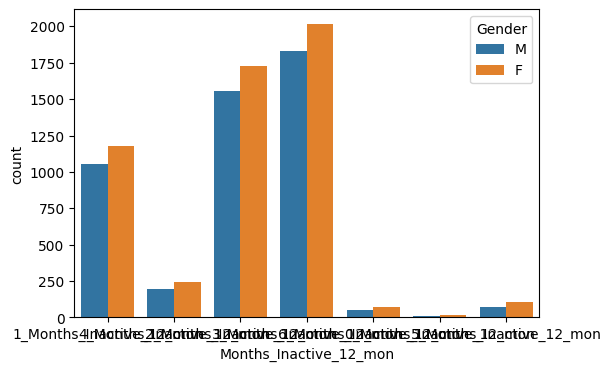

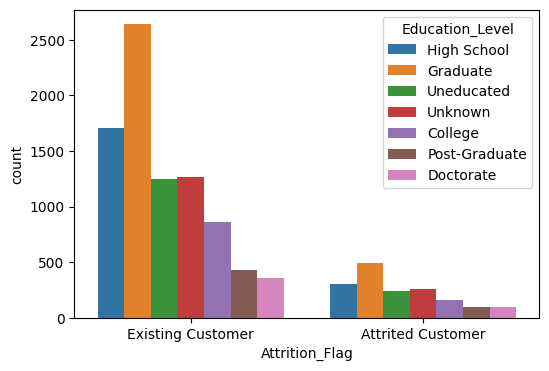

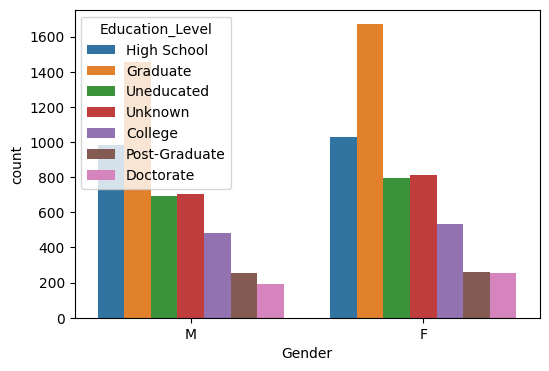

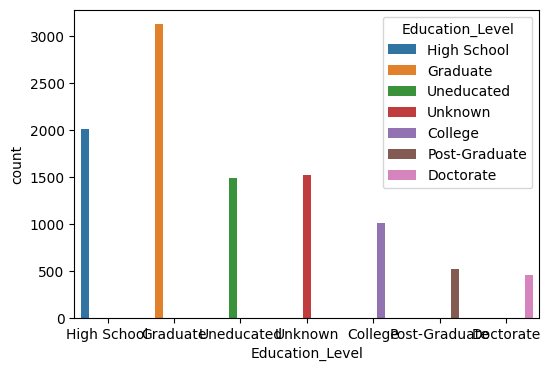

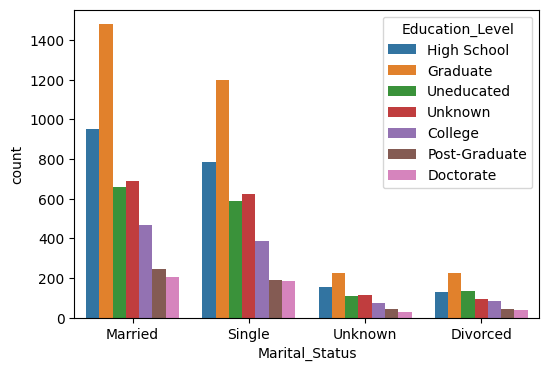

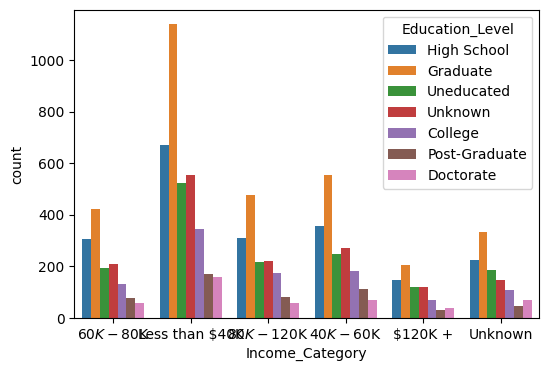

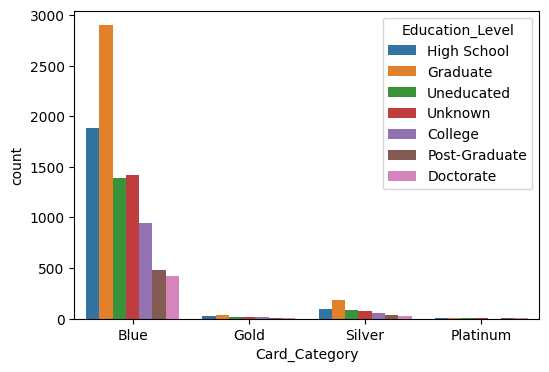

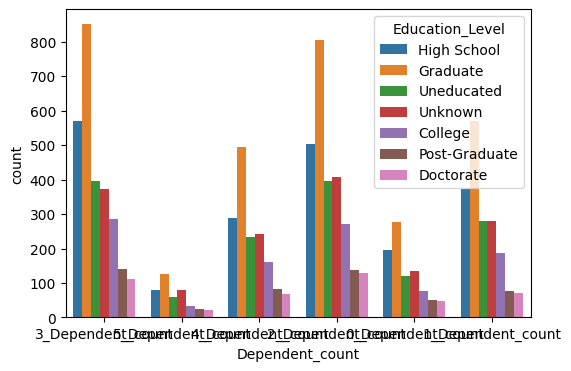

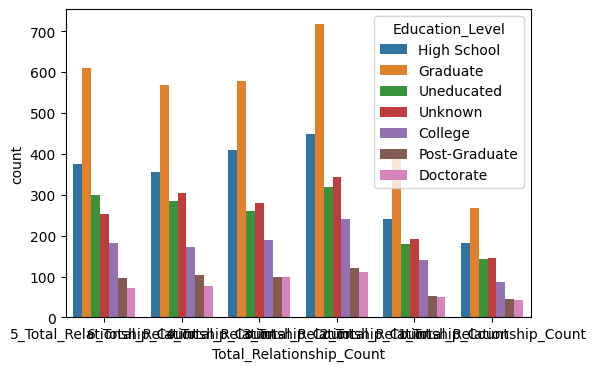

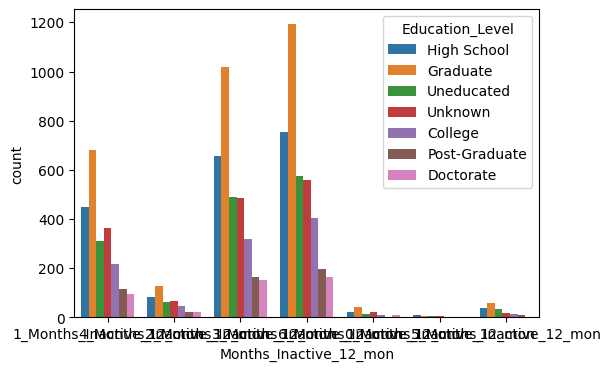

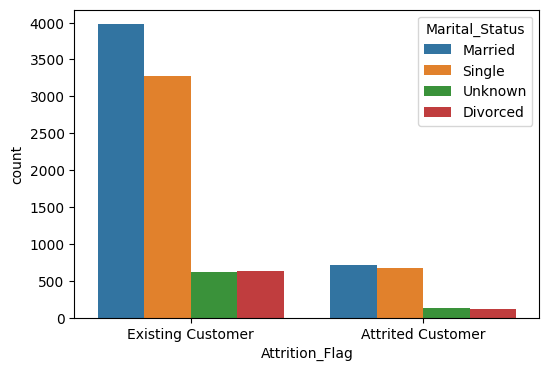

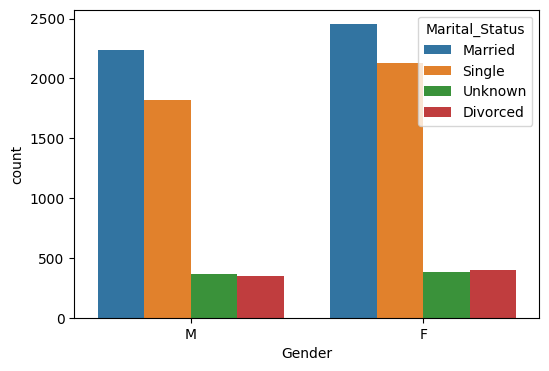

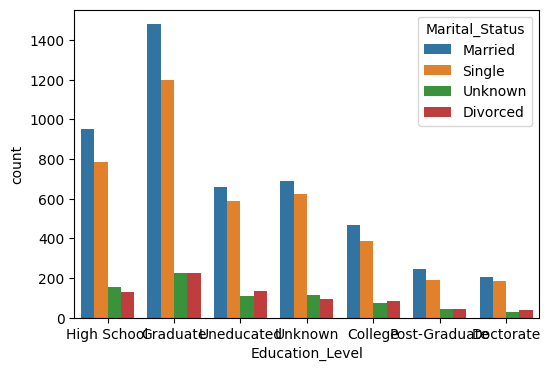

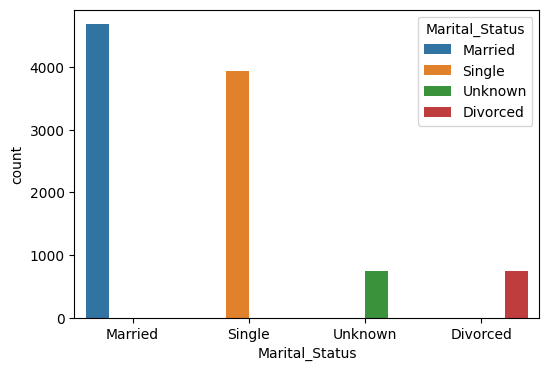

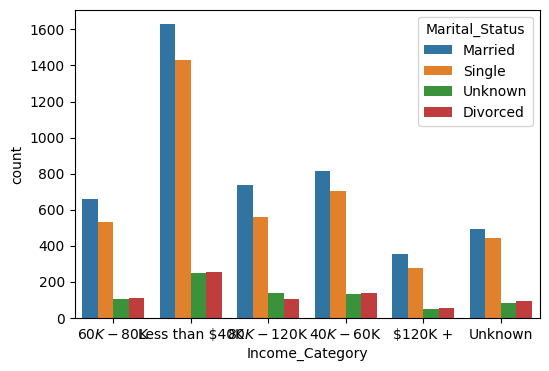

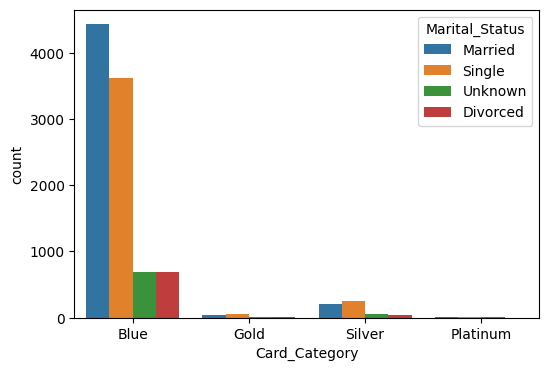

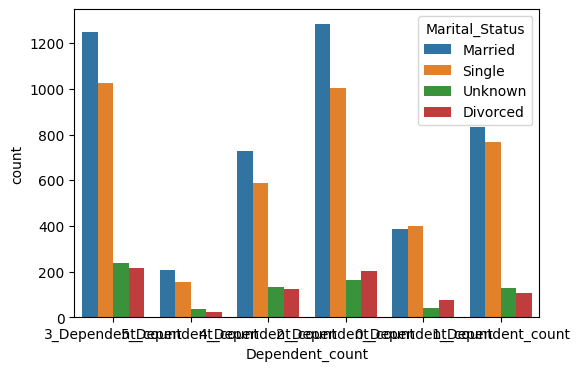

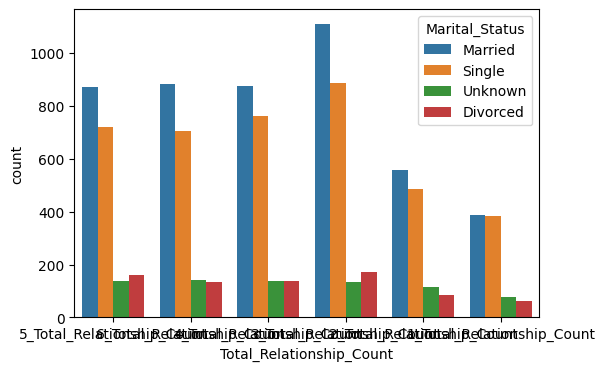

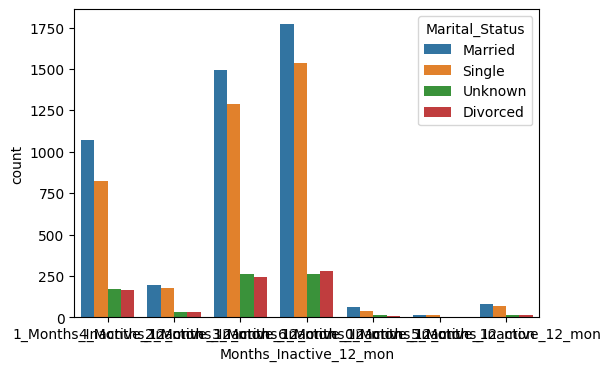

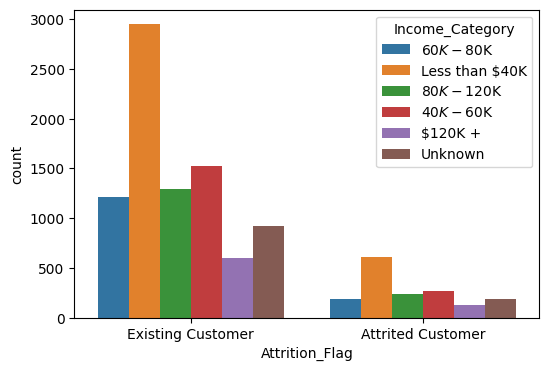

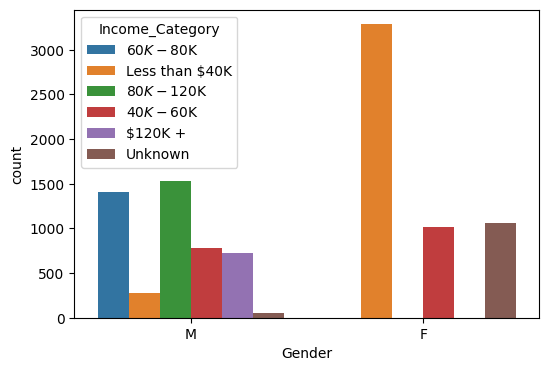

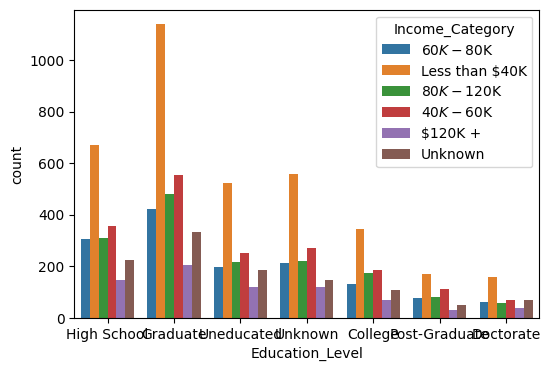

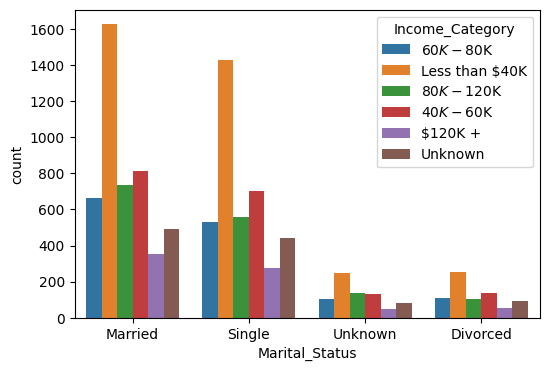

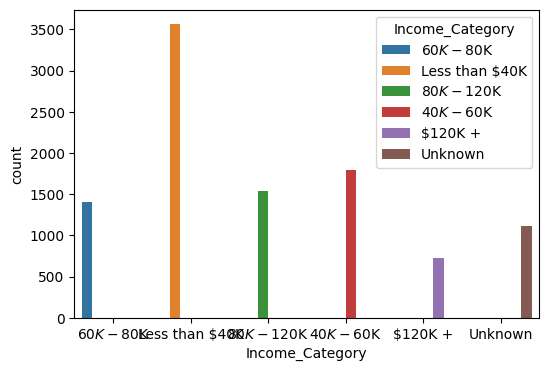

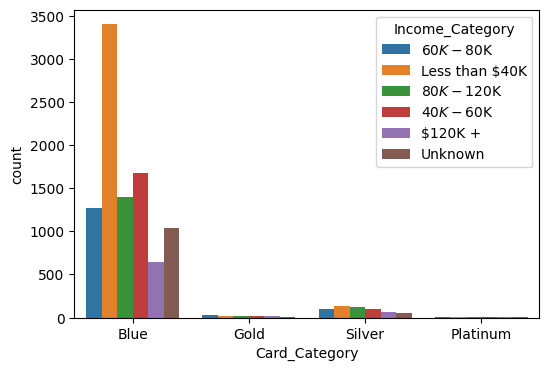

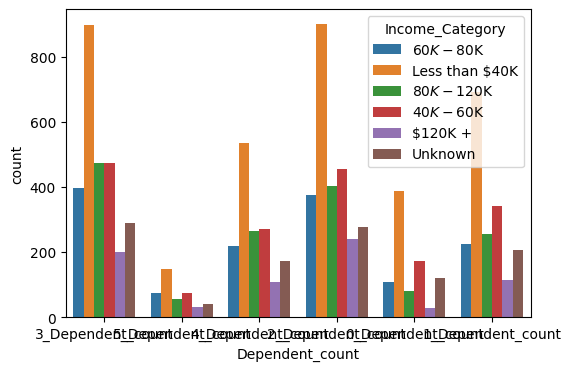

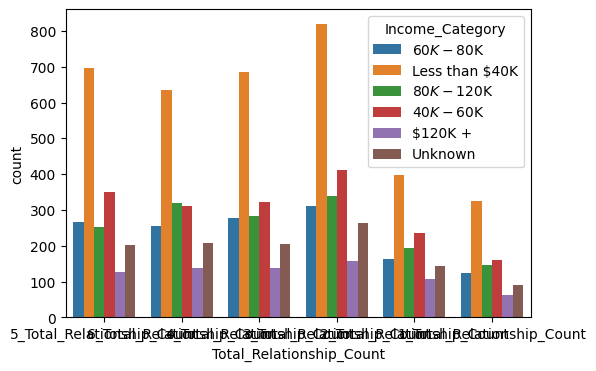

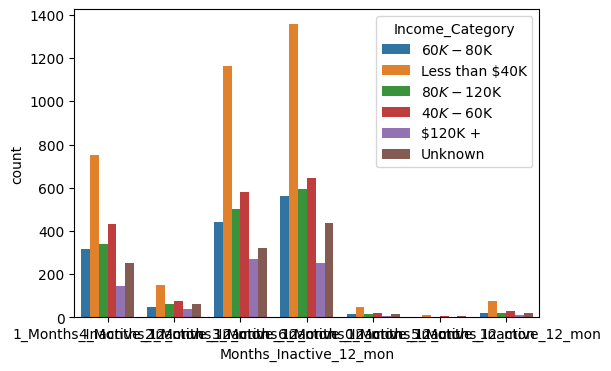

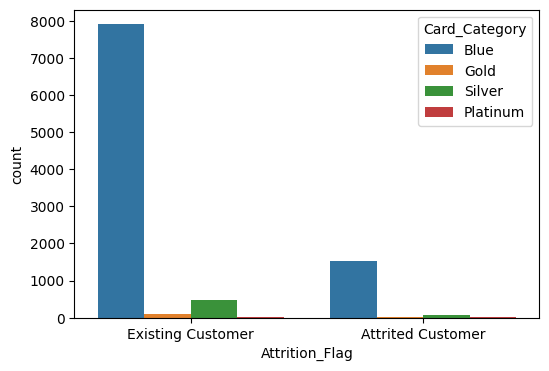

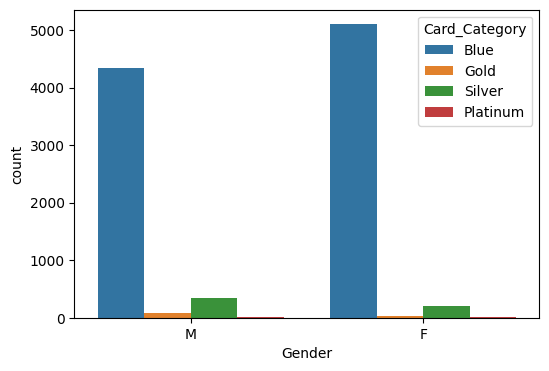

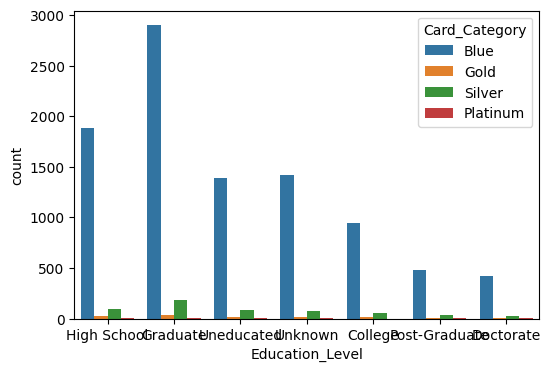

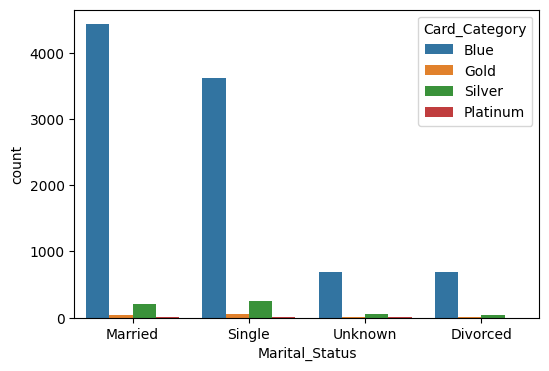

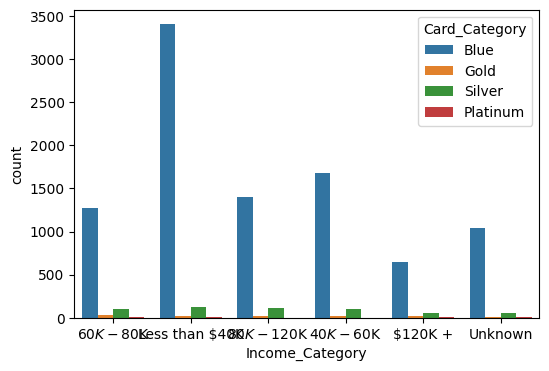

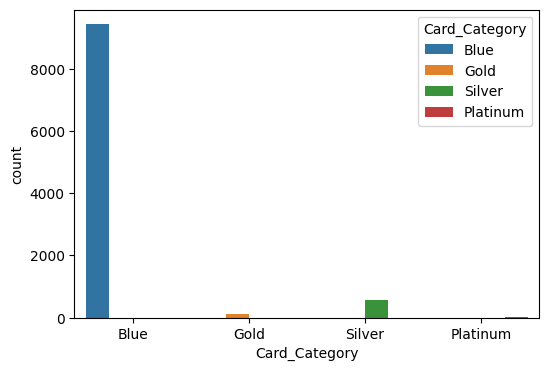

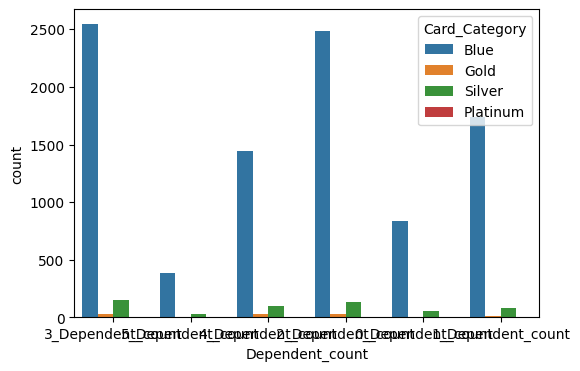

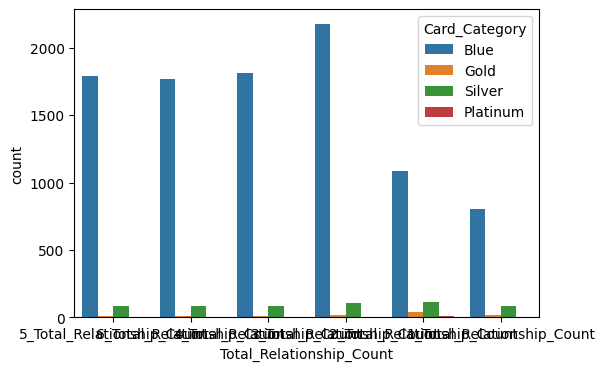

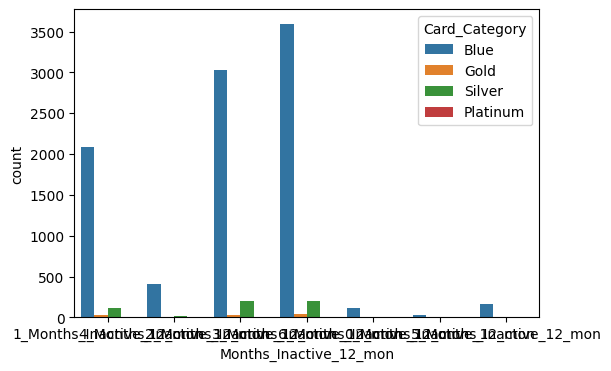

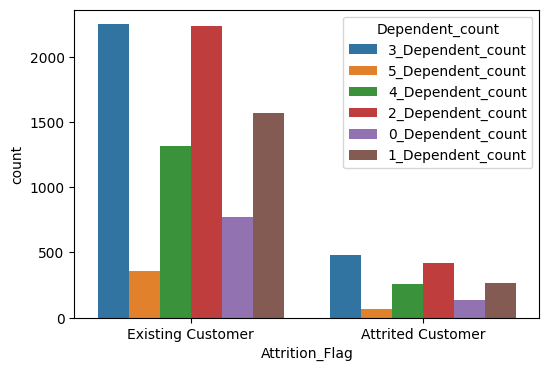

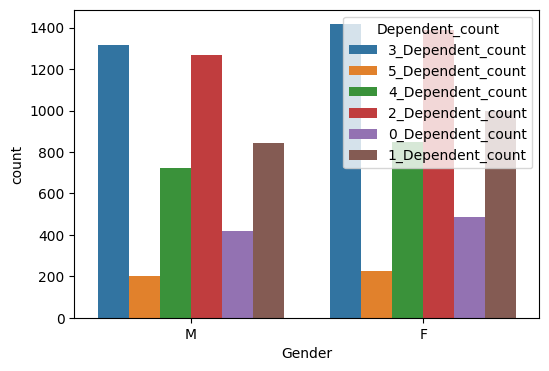

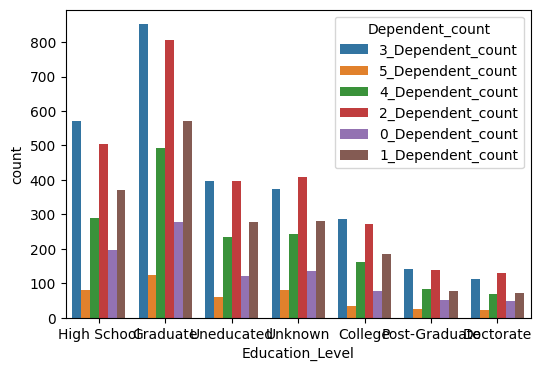

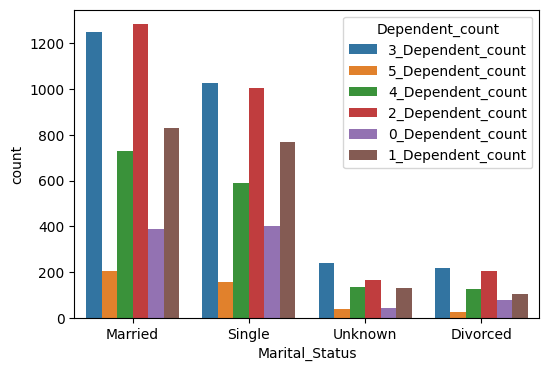

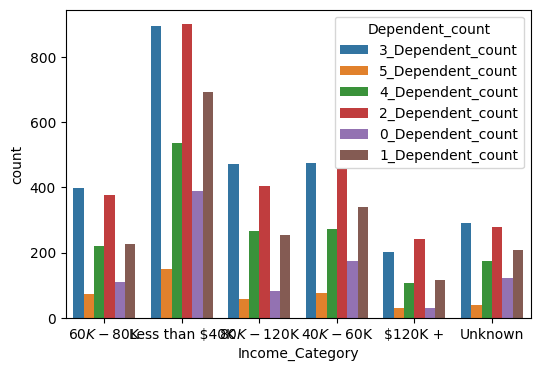

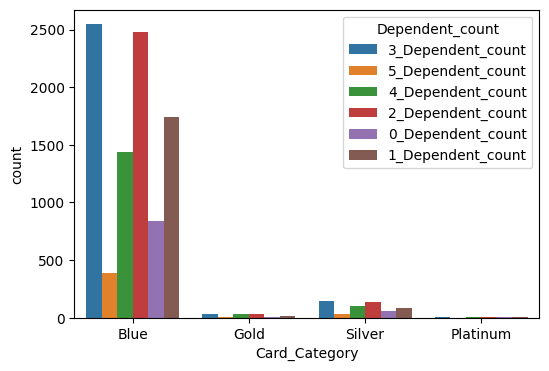

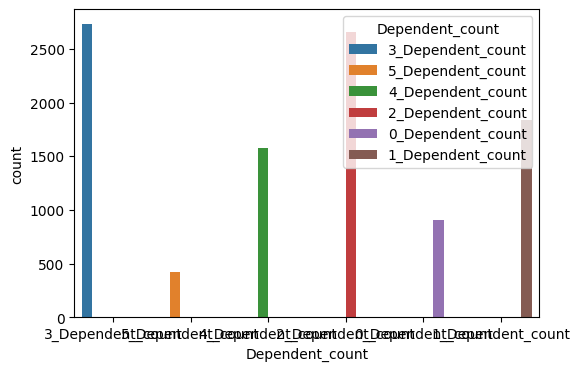

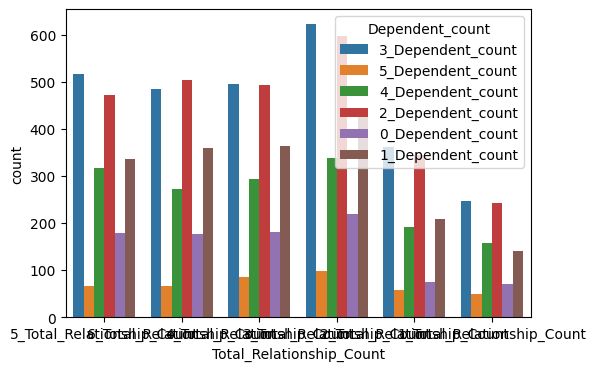

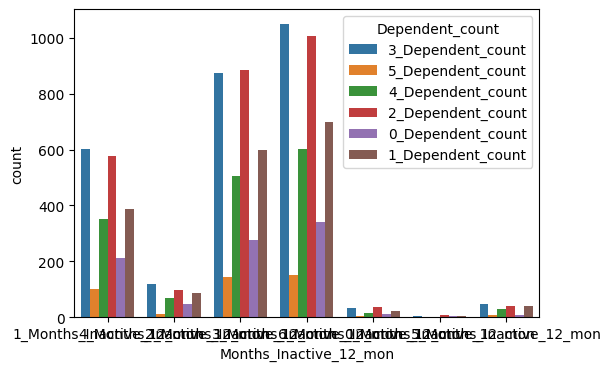

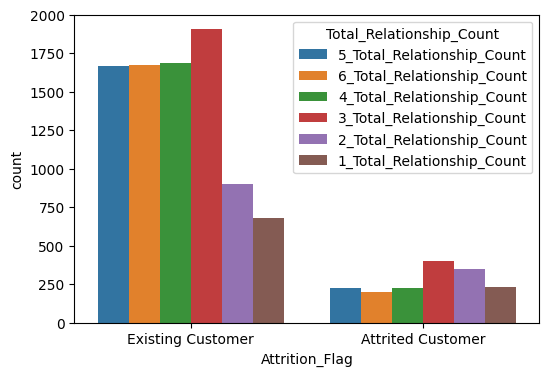

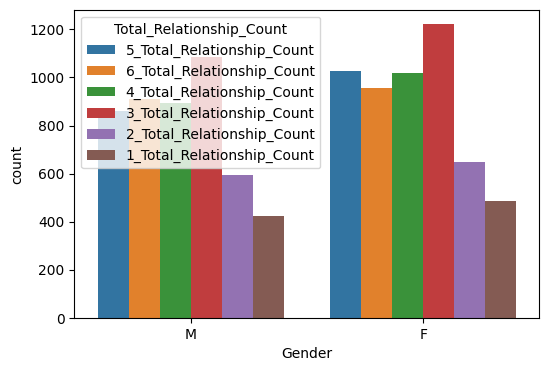

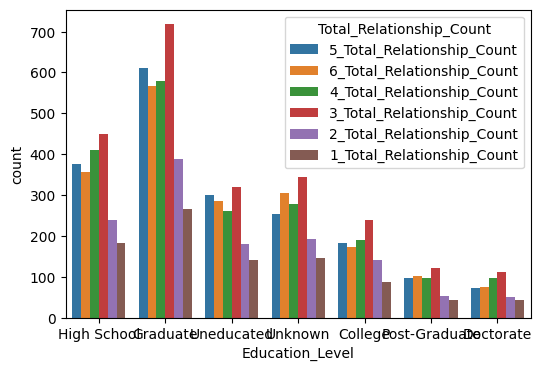

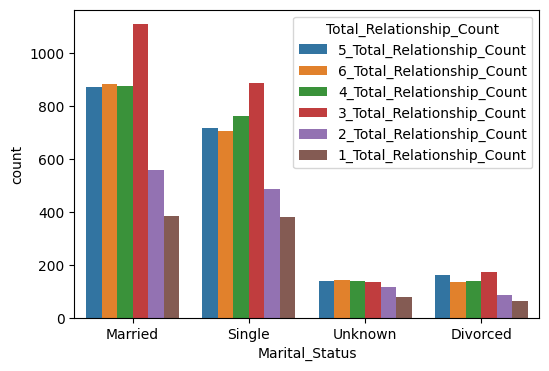

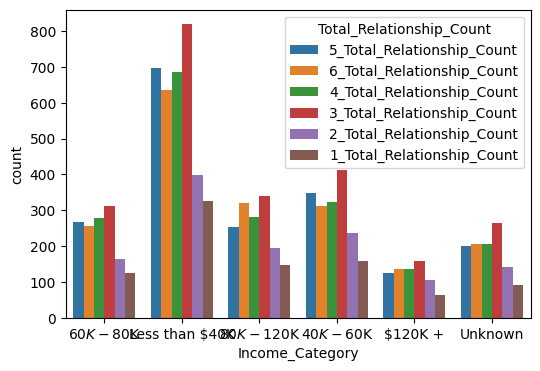

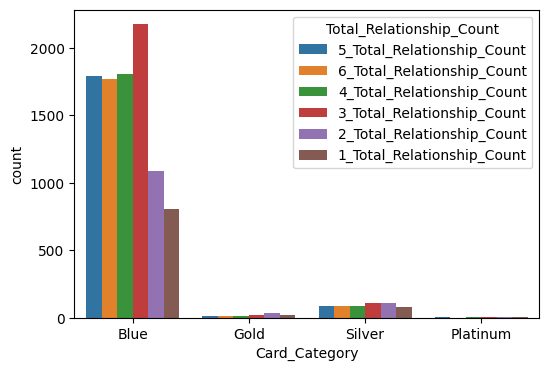

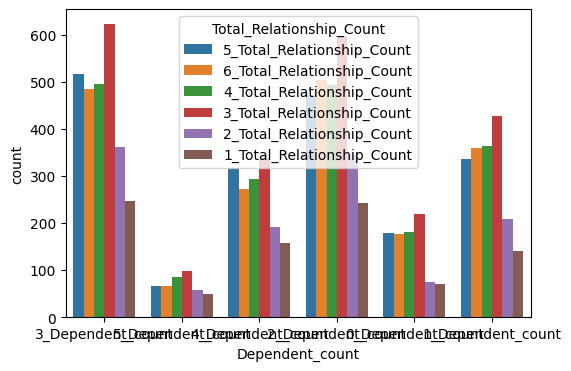

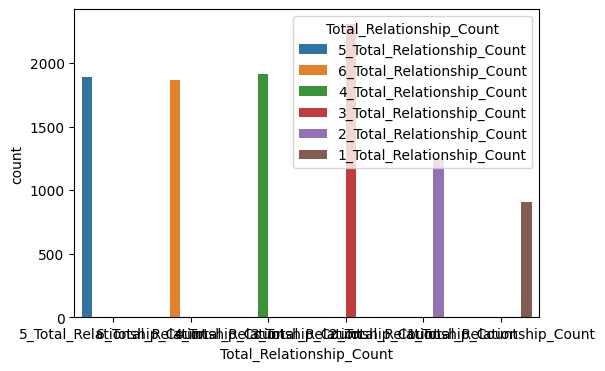

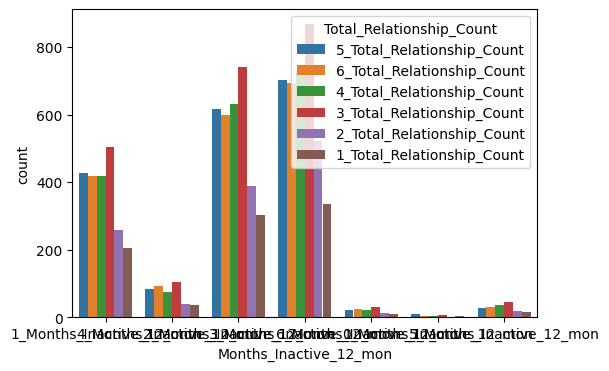

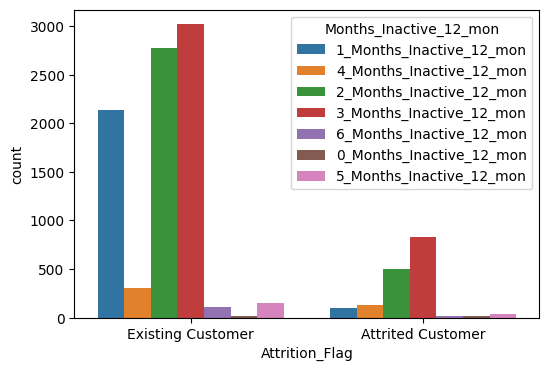

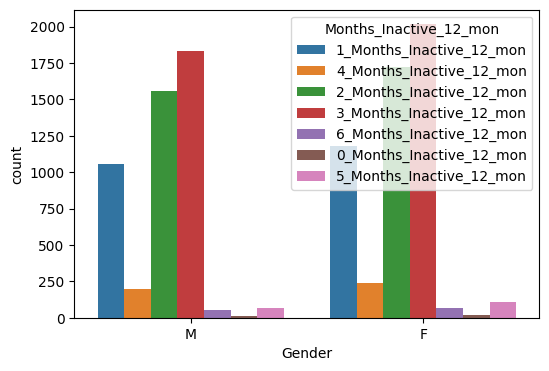

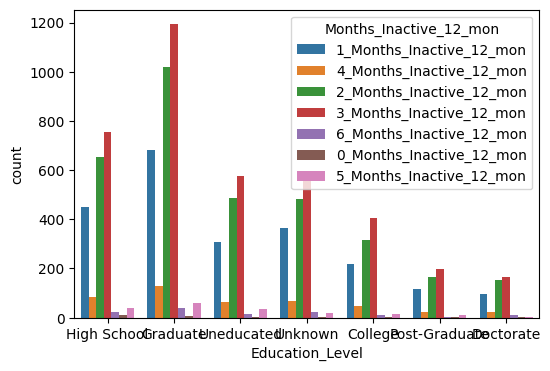

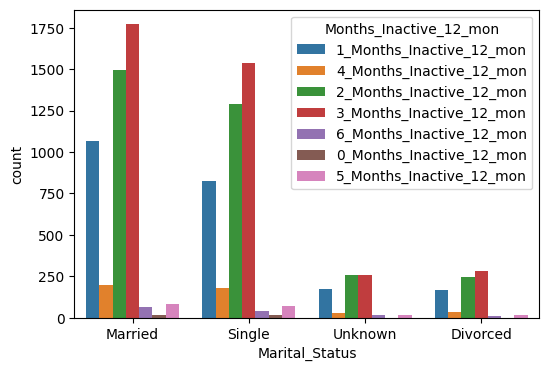

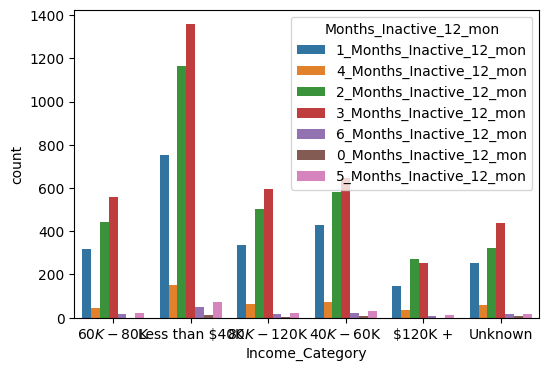

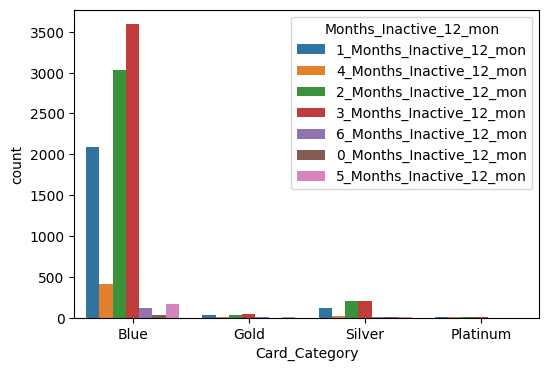

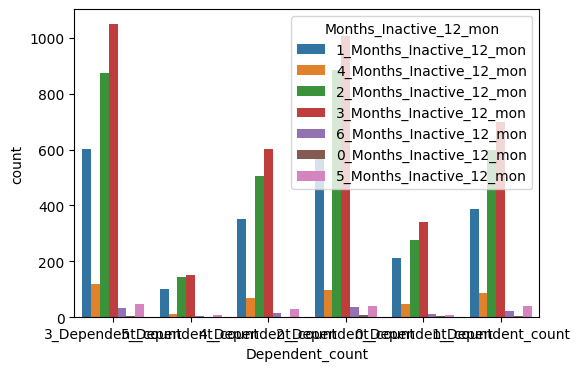

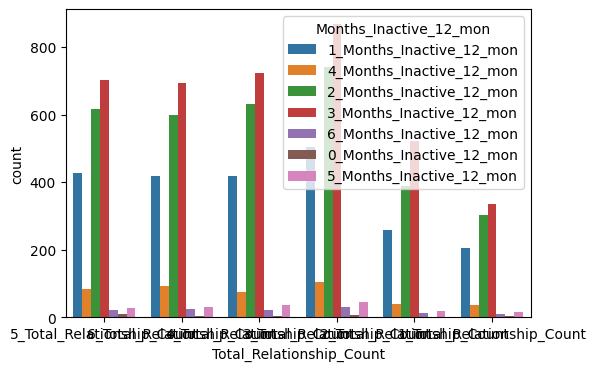

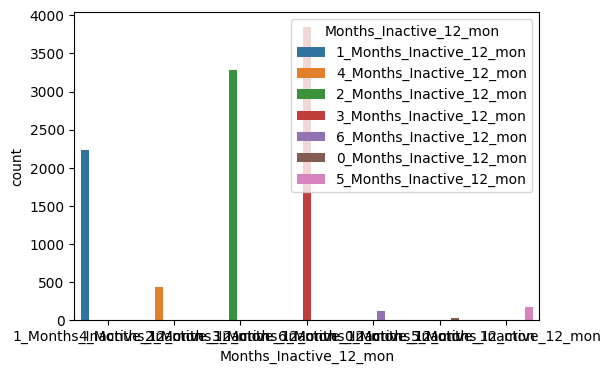

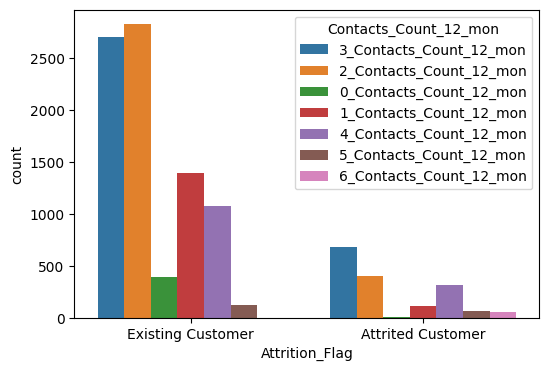

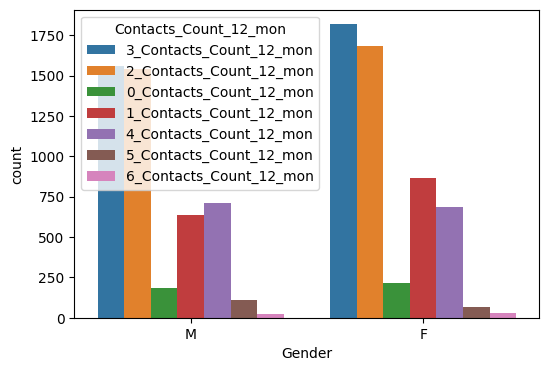

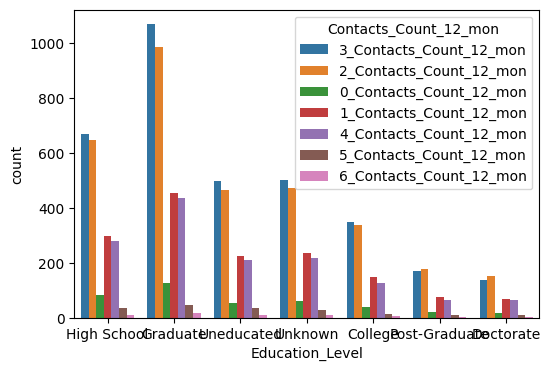

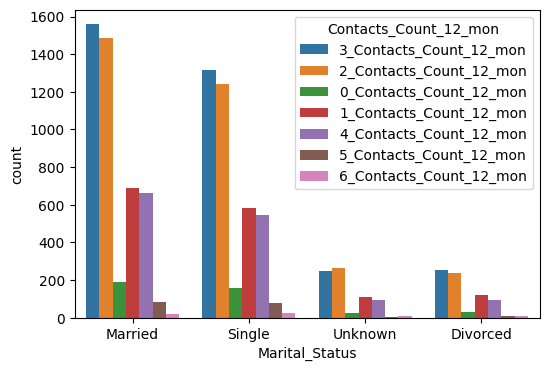

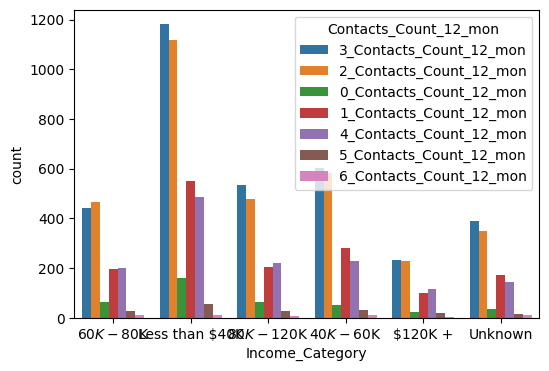

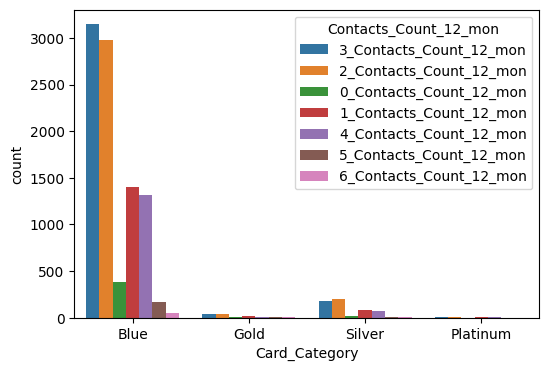

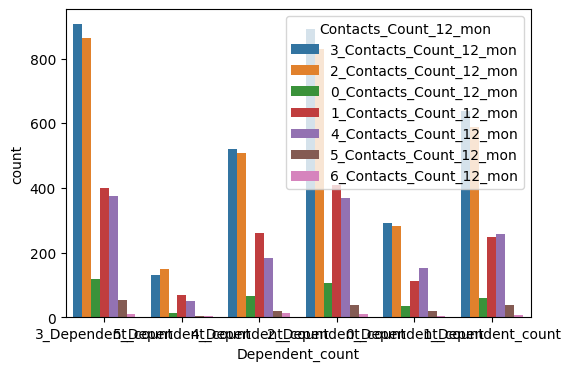

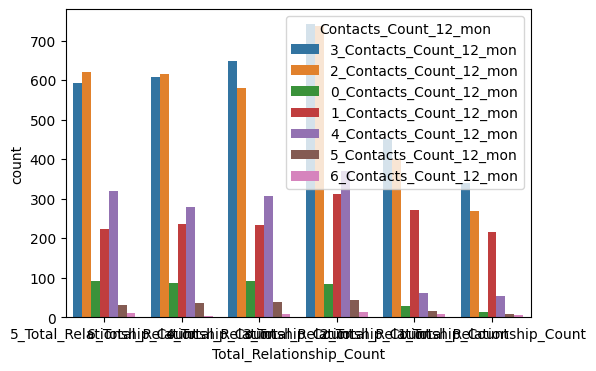

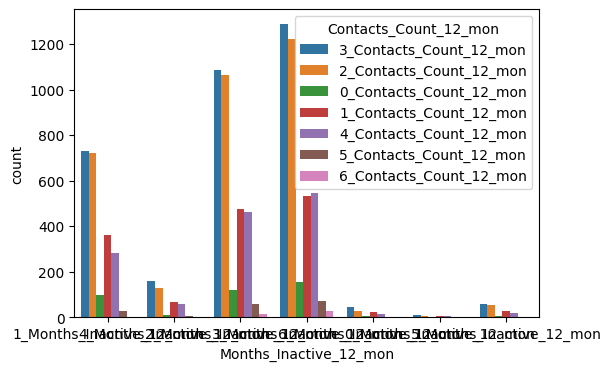

In [104]:
cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

for col in cols:
  for col2 in cols[:-1]:
    plt.figure(figsize=[6,4])

    sns.countplot(data=df,
                  x=col2,
                  hue=col)

<h3> Relationship between continuous variables

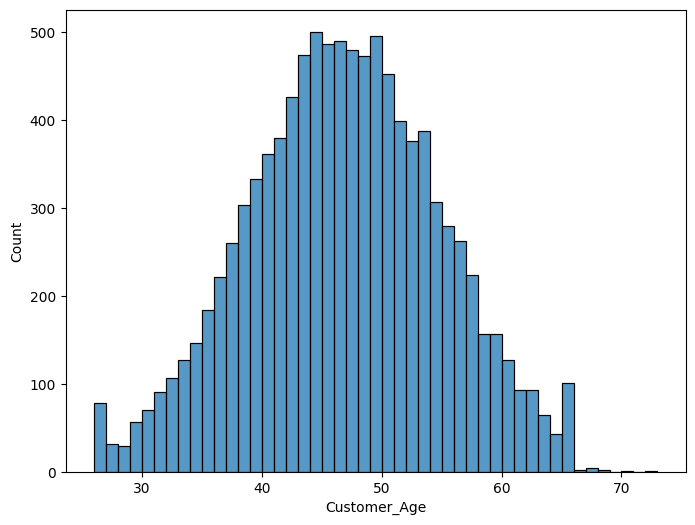

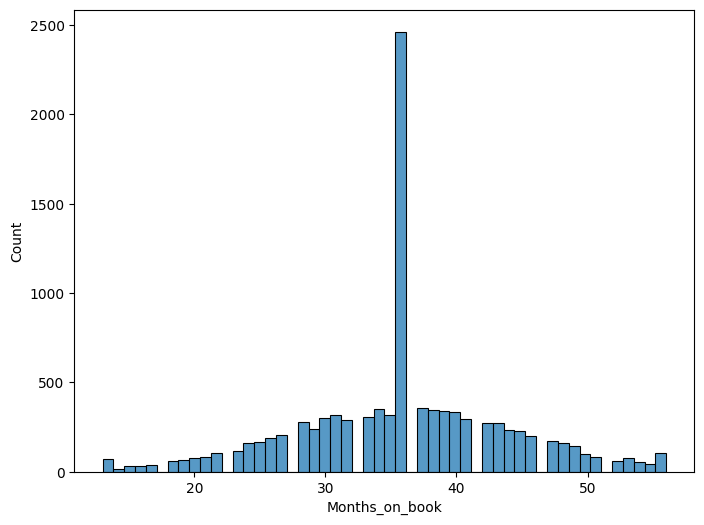

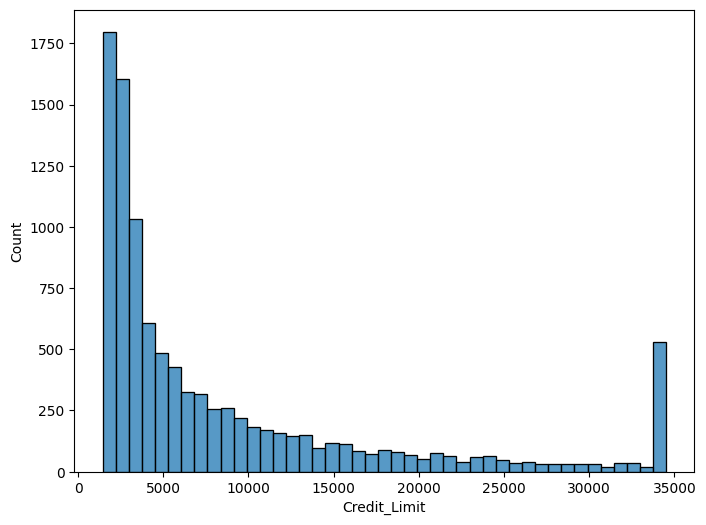

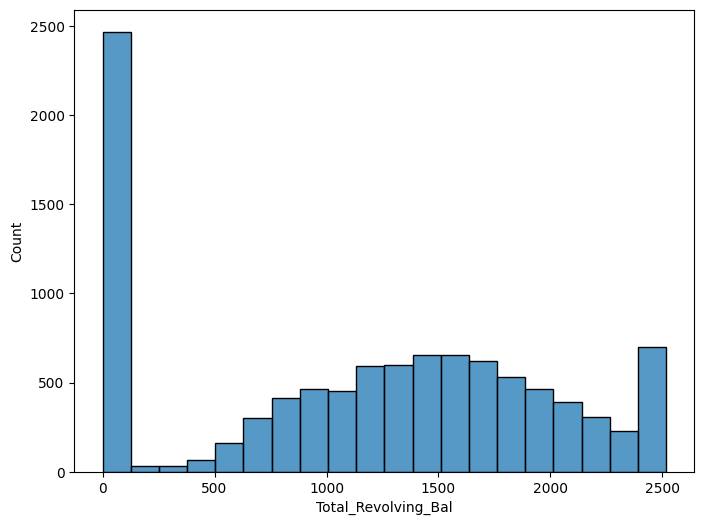

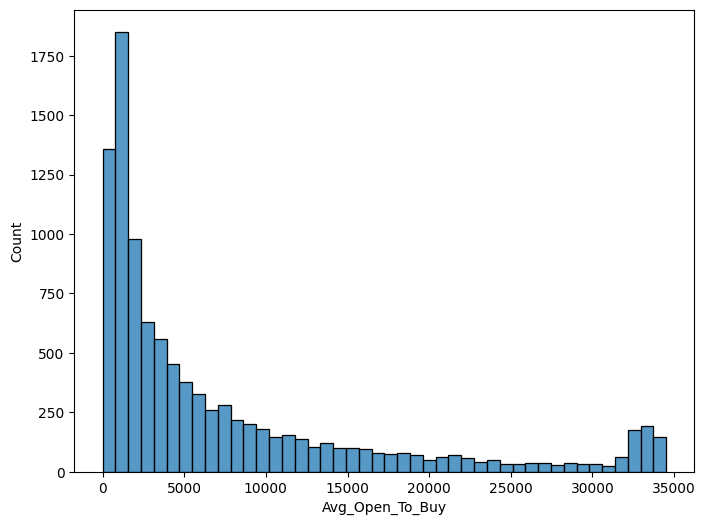

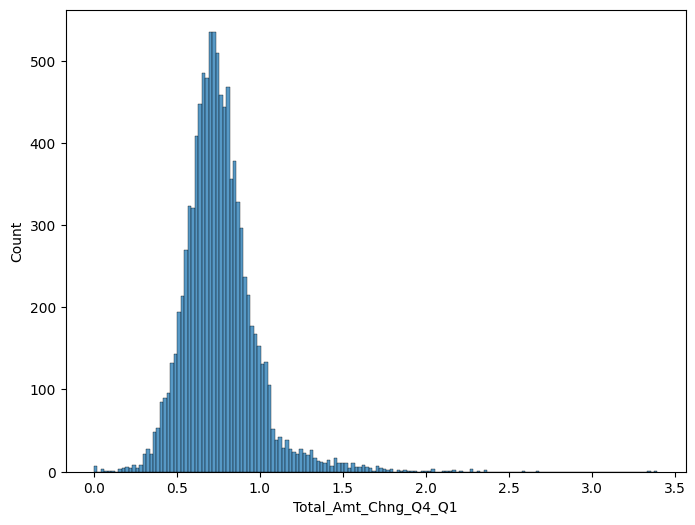

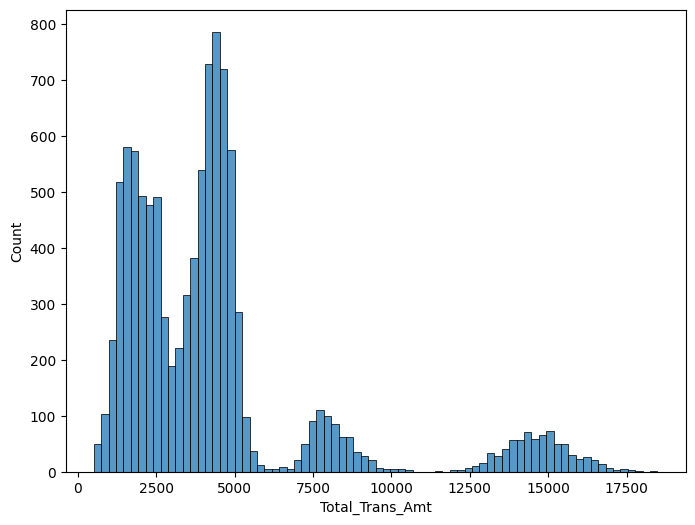

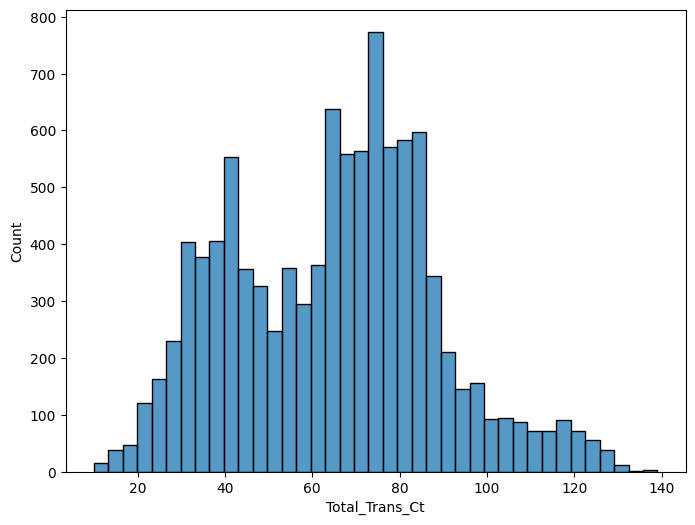

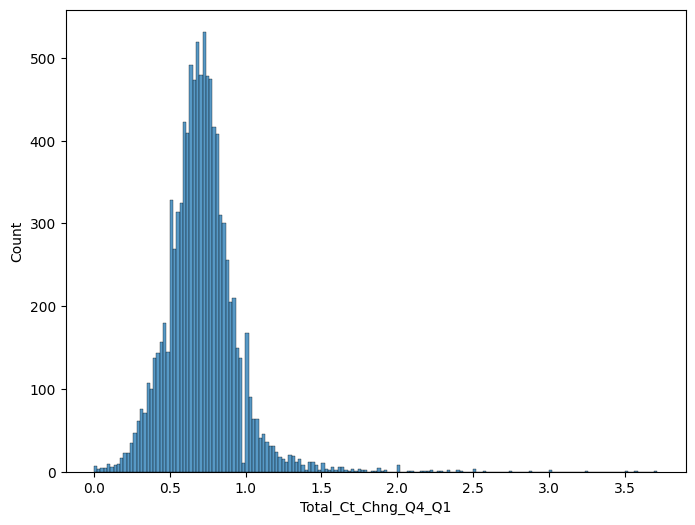

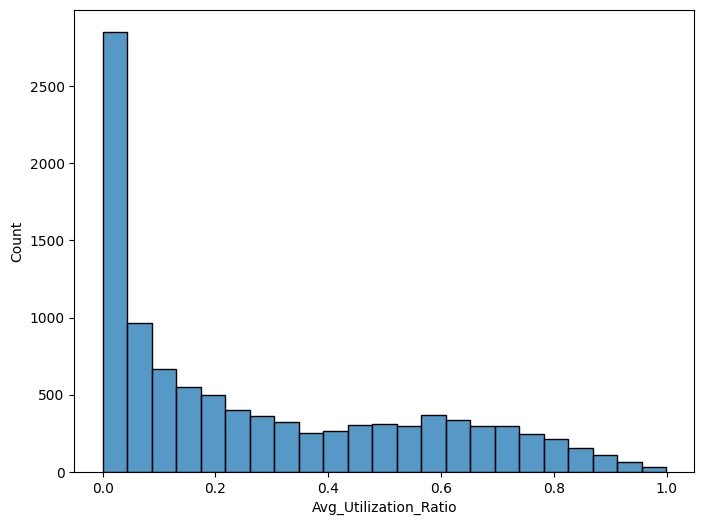

In [105]:
for col in ['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']:
  plt.figure(figsize=[8,6])
  sns.histplot(data=df,
               x=col)

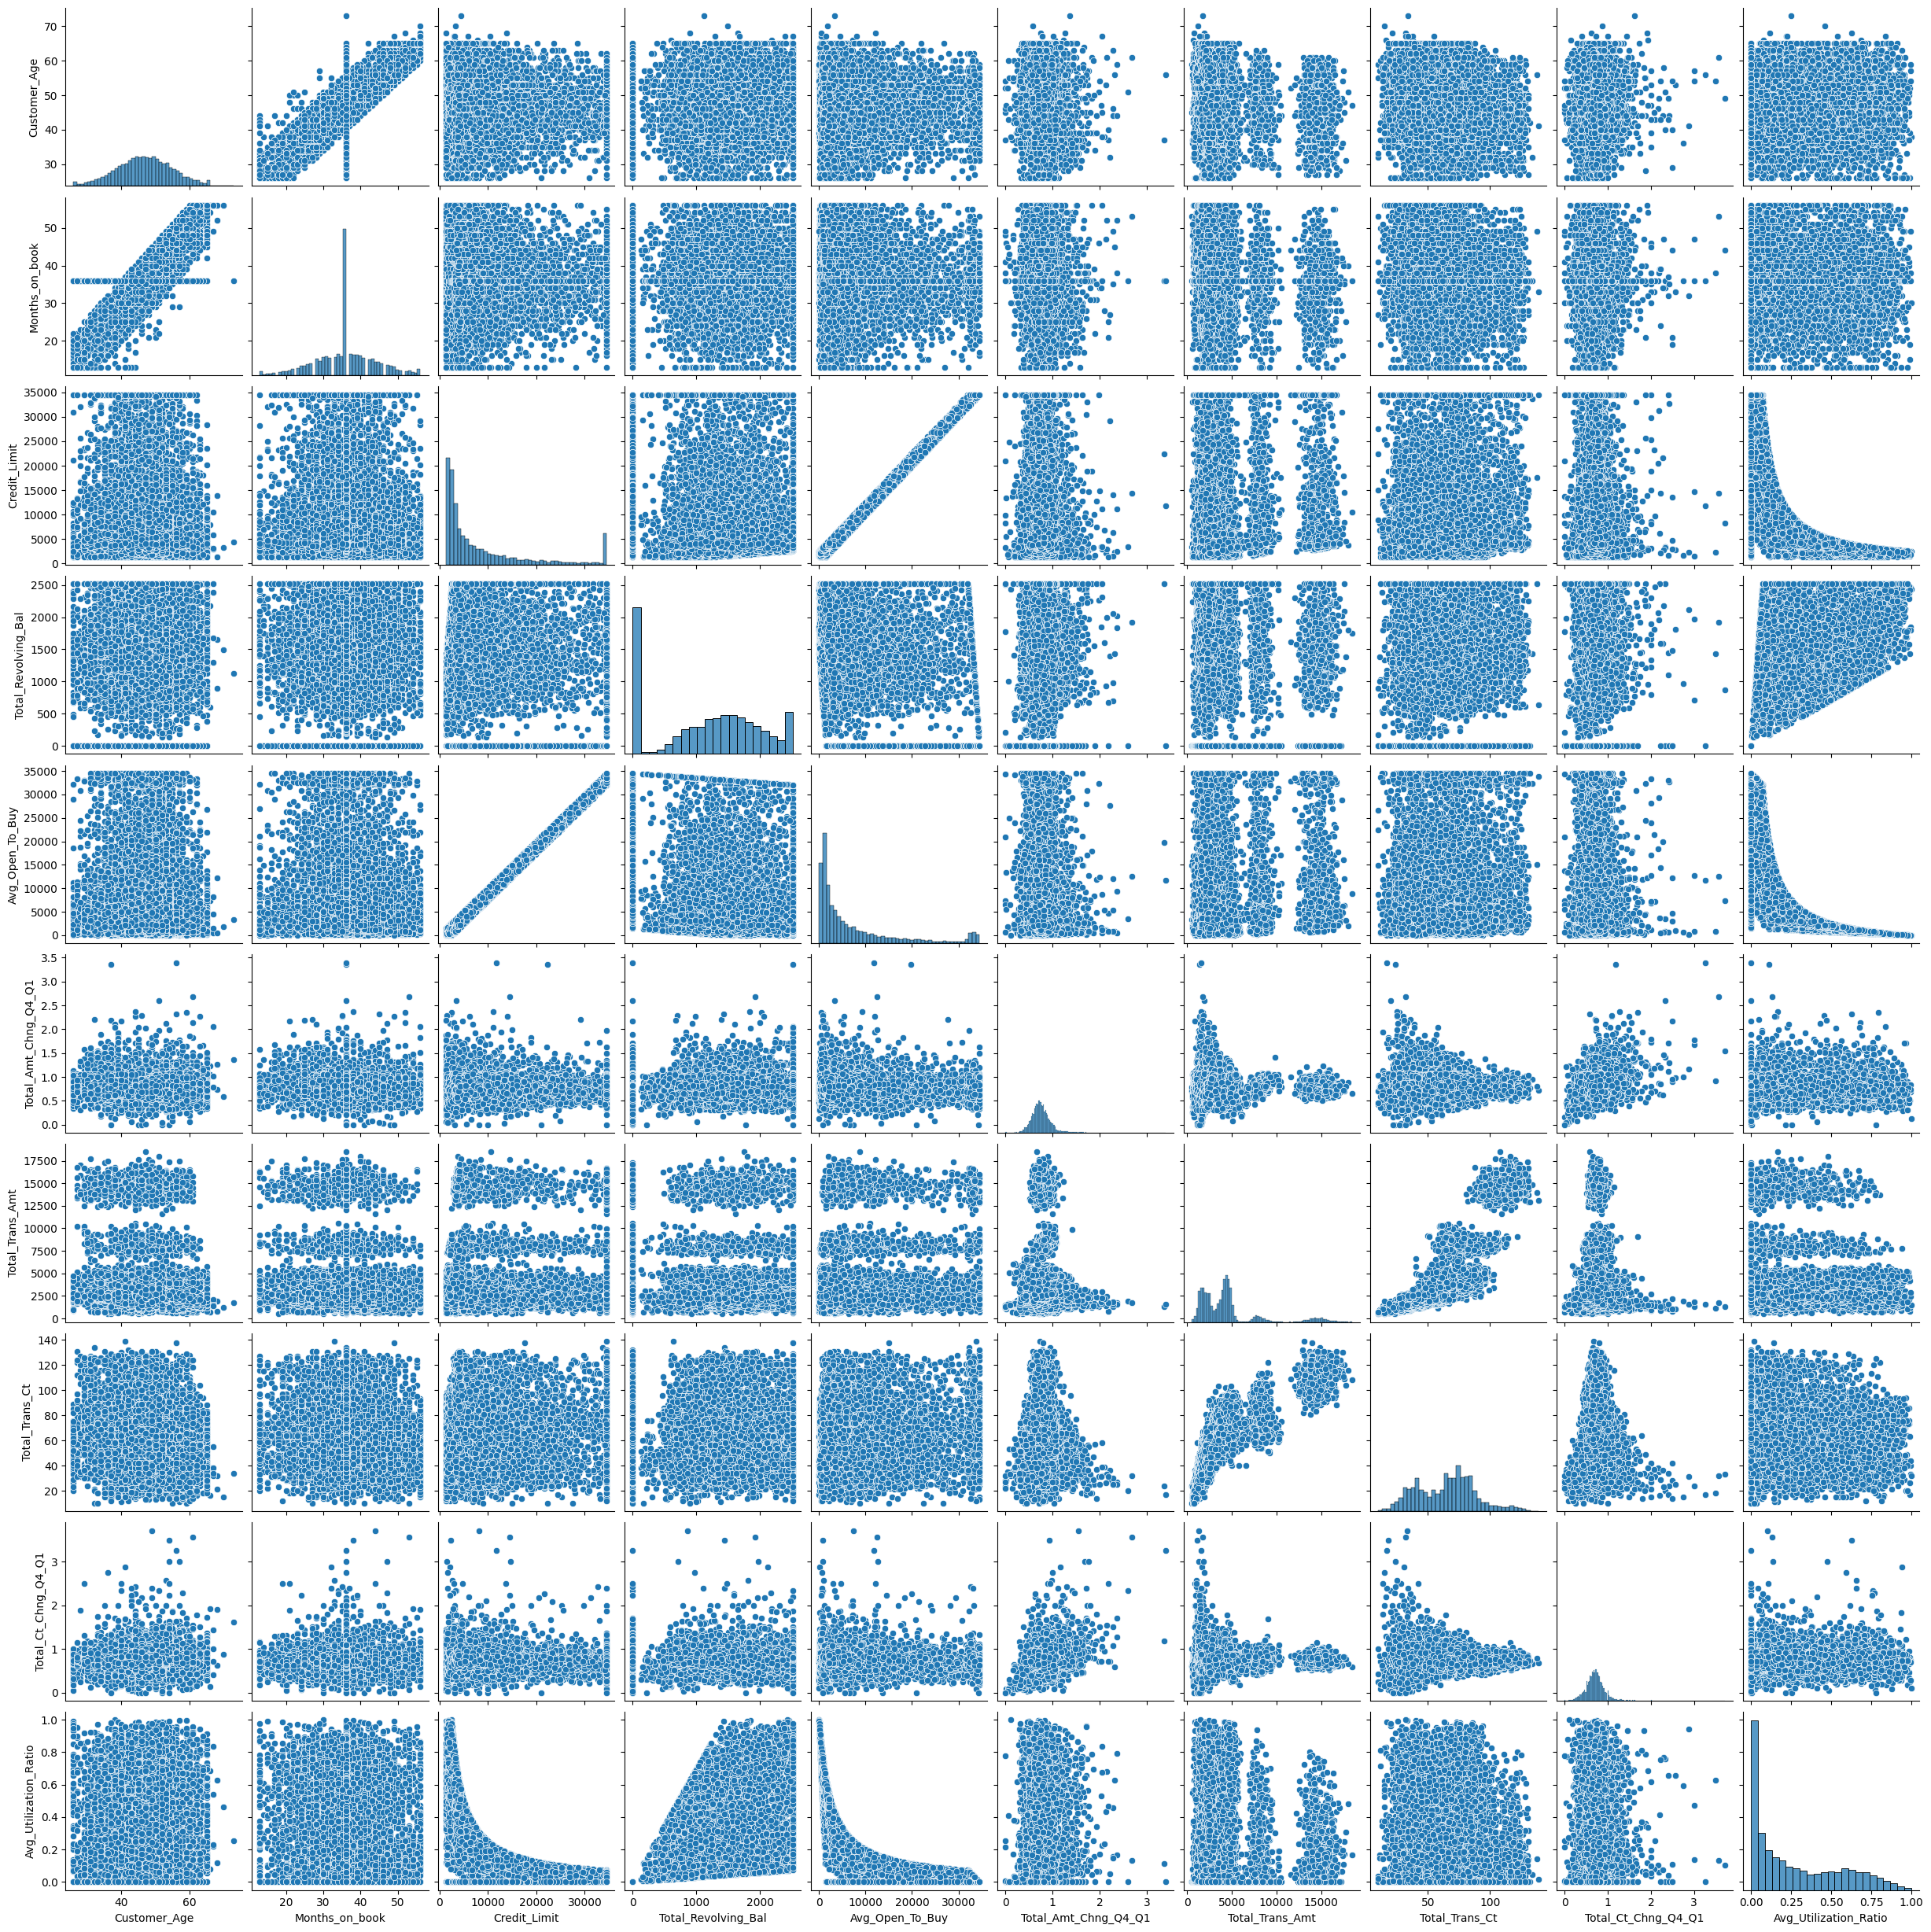

In [106]:
sns.pairplot(data=df.drop(columns='CLIENTNUM'))

<Axes: >

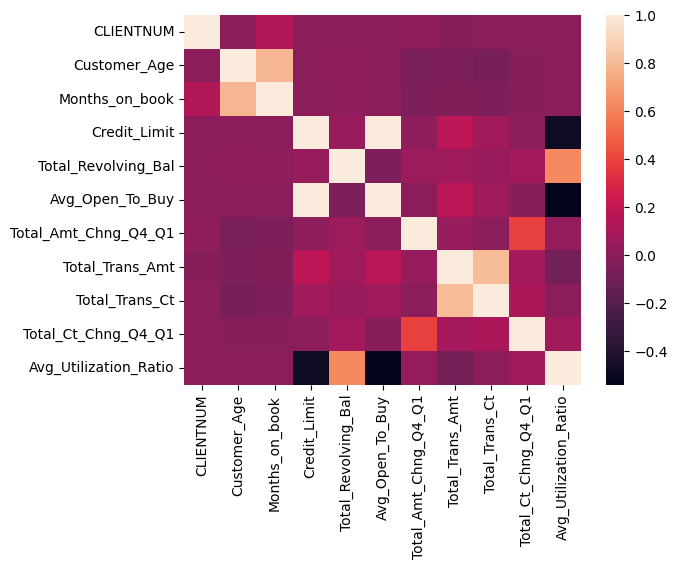

In [107]:
sns.heatmap(data=df.corr())

<h3>Relationship between Categorical and Continuous Variables

<Axes: xlabel='Attrition_Flag', ylabel='Months_on_book'>

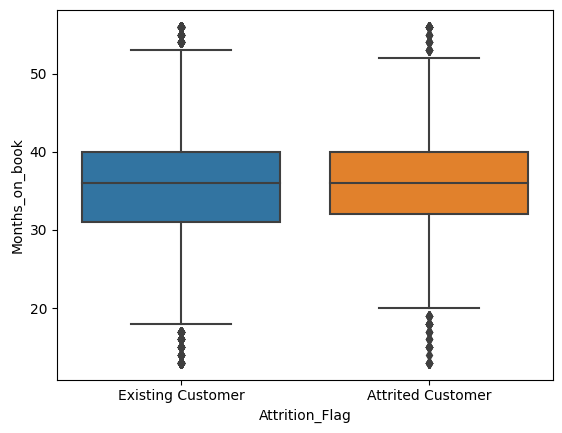

In [109]:
sns.boxplot(data=df,
            y='Months_on_book',
            x='Attrition_Flag')

<Axes: xlabel='Attrition_Flag', ylabel='Credit_Limit'>

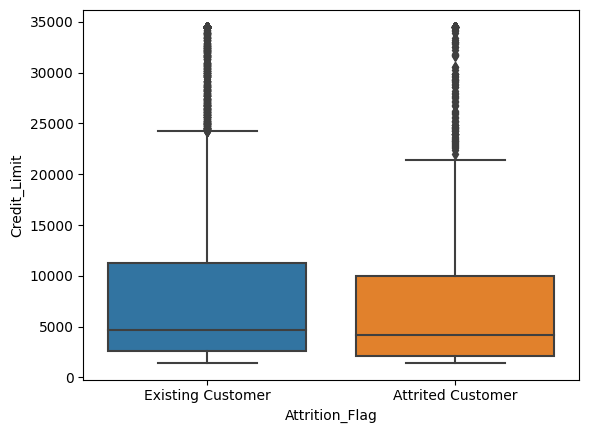

In [110]:
sns.boxplot(data=df,
            y='Credit_Limit',
            x='Attrition_Flag')

<Axes: xlabel='Attrition_Flag', ylabel='Customer_Age'>

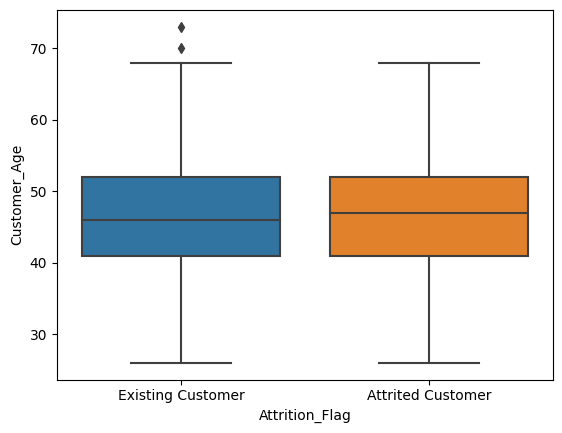

In [111]:
sns.boxplot(data=df,
            y='Customer_Age',
            x='Attrition_Flag')

<h1>Data Preprocessing

<h3>Removing columns that are not useful

In [187]:
df

CLIENTNUM  Customer_Age  Months_on_book  Credit_Limit  \
0      768805383            45              39       12691.0   
1      818770008            49              44        8256.0   
2      713982108            51              36        3418.0   
3      769911858            40              34        3313.0   
4      709106358            40              21        4716.0   
...          ...           ...             ...           ...   
10122  772366833            50              40        4003.0   
10123  710638233            41              25        4277.0   
10124  716506083            44              36        5409.0   
10125  717406983            30              36        5281.0   
10126  714337233            43              25       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777          11914.0                 1.335   
1                      864           7392.0                 1.541   
2                        0           3418.0                 2.594   
3                     2517            796.0                 1.405   
4                        0           4716.0                 2.175   
...                    ...              ...                   ...   
10122                 1851           2152.0                 0.703   
10123                 2186           2091.0                 0.804   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  ...  \
0                 1144              42                1.625  ...   
1                 1291              33                3.714  ...   
2                 1887              20                2.333  ...   
3                 1171              20                2.333  ...   
4                  816              28                2.500  ...   
...                ...             ...                  ...  ...   
10122            15476             117                0.857  ...   
10123             8764              69                0.683  ...   
10124            10291              60                0.818  ...   
10125             8395              62                0.722  ...   
10126            10294              61                0.649  ...   

       3_Months_Inactive_12_mon  4_Months_Inactive_12_mon  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         1   
4                             0                         0   
...                         ...                       ...   
10122                         0                         0   
10123                         0                         0   
10124                         1                         0   
10125                         1                         0   
10126                         0                         0   

       5_Months_Inactive_12_mon  6_Months_Inactive_12_mon  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
10122                         0                         0   
10123                         0                         0   
10124                         0                         0   
10125                         0                         0   
10126                         0                         0   

       1_Contacts_Count_12_mon  2_Contacts_Count_12_mon  \
0                            0                        0   
1       

In [188]:
df = df.drop(columns='CLIENTNUM')

In [189]:
df

Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
0                45              39       12691.0                  777   
1                49              44        8256.0                  864   
2                51              36        3418.0                    0   
3                40              34        3313.0                 2517   
4                40              21        4716.0                    0   
...             ...             ...           ...                  ...   
10122            50              40        4003.0                 1851   
10123            41              25        4277.0                 2186   
10124            44              36        5409.0                    0   
10125            30              36        5281.0                    0   
10126            43              25       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  ...  \
0                    1.625                  0.061  ...   
1                    3.714                  0.105  ...   
2                    2.333                  0.000  ...   
3                    2.333                  0.760  ...   
4                    2.500                  0.000  ...   
...                    ...                    ...  ...   
10122                0.857                  0.462  ...   
10123                0.683                  0.511  ...   
10124                0.818                  0.000  ...   
10125                0.722                  0.000  ...   
10126                0.649                  0.189  ...   

       3_Months_Inactive_12_mon  4_Months_Inactive_12_mon  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         1   
4                             0                         0   
...                         ...                       ...   
10122                         0                         0   
10123                         0                         0   
10124                         1                         0   
10125                         1                         0   
10126                         0                         0   

       5_Months_Inactive_12_mon  6_Months_Inactive_12_mon  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
10122                         0                         0   
10123                         0                         0   
10124                         0                         0   
10125                         0                         0   
10126                         0             

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_Age                10127 non-null  int64  
 1   Months_on_book              10127 non-null  int64  
 2   Credit_Limit                10127 non-null  float64
 3   Total_Revolving_Bal         10127 non-null  int64  
 4   Avg_Open_To_Buy             10127 non-null  float64
 5   Total_Amt_Chng_Q4_Q1        10127 non-null  float64
 6   Total_Trans_Amt             10127 non-null  int64  
 7   Total_Trans_Ct              10127 non-null  int64  
 8   Total_Ct_Chng_Q4_Q1         10127 non-null  float64
 9   Avg_Utilization_Ratio       10127 non-null  float64
 10  Existing Customer           10127 non-null  uint8  
 11  M                           10127 non-null  uint8  
 12  Doctorate                   10127 non-null  uint8  
 13  Graduate                    101

<h3>Converting Cateogrical Variables to Dummy Variables

<h3>One hot encoding

In [113]:
dummies = []

cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

for col in cols:
   dummies.append(pd.get_dummies(df[col], drop_first=True))

In [114]:
df_dummies = pd.concat(dummies, axis=1)
df_dummies

Existing Customer  M  Doctorate  Graduate  High School  Post-Graduate  \
0                      1  1          0         0            1              0   
1                      1  0          0         1            0              0   
2                      1  1          0         1            0              0   
3                      1  0          0         0            1              0   
4                      1  1          0         0            0              0   
...                  ... ..        ...       ...          ...            ...   
10122                  1  1          0         1            0              0   
10123                  0  1          0         0            0              0   
10124                  0  0          0         0            1              0   
10125                  0  1          0         1            0              0   
10126                  0  0          0         1            0              0   

       Uneducated  Unknown  Married  Single  ...  3_Months_Inactive_12_mon  \
0               0        0        1       0  ...                         0   
1               0        0        0       1  ...                         0   
2               0        0        1       0  ...                         0   
3               0        0        0       0  ...                         0   
4               1        0        1       0  ...                         0   
...           ...      ...      ...     ...  ...                       ...   
10122           0        0        0       1  ...                         0   
10123           0        1        0       0  ...                         0   
10124           0        0        1       0  ...                         1   
10125           0        0        0       0  ...                         1   
10126           0        0        1       0  ...                         0   

       4_Months_Inactive_12_mon  5_Months_Inactive_12_mon  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             1                         0   
4                             0                         0   
...                         ...                       ...   
10122                         0                         0   
10123                         0                         0   
10124                         0                         0   
10125                         0                         0   
10126                         0                         0   

       6_Months_Inactive_12_mon  1_Contacts_Count_12_mon  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        1   
4                             0                        0   
...                         ...                      ...   
10122                         0                        0   
10123                         0                        0   
10124                         0                        0   
10125                         0                        0   
10126                         0                        0   

       2_Contacts_Count_12_mon  3_Contacts_Count_12_mon  \
0                            0                        1   
1                            1                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
10122                        0                        1   
10123                        0                        1   
10124                        0                        0   
10125                        0                        1   
10126 

In [115]:
df=pd.concat((df,df_dummies),axis=1)

In [116]:
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender    Dependent_count  \
0      768805383  Existing Customer            45      M  3_Dependent_count   
1      818770008  Existing Customer            49      F  5_Dependent_count   
2      713982108  Existing Customer            51      M  3_Dependent_count   
3      769911858  Existing Customer            40      F  4_Dependent_count   
4      709106358  Existing Customer            40      M  3_Dependent_count   
...          ...                ...           ...    ...                ...   
10122  772366833  Existing Customer            50      M  2_Dependent_count   
10123  710638233  Attrited Customer            41      M  2_Dependent_count   
10124  716506083  Attrited Customer            44      F  1_Dependent_count   
10125  717406983  Attrited Customer            30      M  2_Dependent_count   
10126  714337233  Attrited Customer            43      F  2_Dependent_count   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ... 3_Months_Inactive_12_mon 4_Months_Inactive_12_mon  \
0                  39  ...                        0                        0   
1                  44  ...                        0                        0   
2                  36  ...                        0                        0   
3                  34  ...                        0                        1   
4                  21  ...                        0                        0   
...               ...  ...                      ...                      ...   
10122              40  ...                        0                        0   
10123              25  ...                        0                        0   
10124              36  ...                        1                        0   
10125              36  ...                        1                        0   
10126              25  ...                        0                        0   

      5_Months_Inactive_12_mon  6_Months_Inactive_12_mon  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
10122                        0                         0   
10123                        0                         0   
10124                        0                         0   
10125                        0                         0   
10126                        0                         0   

       1_Contacts_Count_12_mon  2_Contacts_Count_12_mon  \
0                            0                        0   
1                            0                        1   
2                            0                        0   
3                            1                        0   
4                            0                        0   
...                        ...                      ...   
10122                        0                        0   
10123                        0                        0   
1012

In [117]:
df = df.drop(columns=cols)

<h3>Splitting data into training and testing

In [118]:
X = df.drop(columns='Existing Customer')
Y = df[['Existing Customer']]

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=23,shuffle=True,test_size=0.2)

In [120]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 1547 to 8787
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CLIENTNUM                   8101 non-null   int64  
 1   Customer_Age                8101 non-null   int64  
 2   Months_on_book              8101 non-null   int64  
 3   Credit_Limit                8101 non-null   float64
 4   Total_Revolving_Bal         8101 non-null   int64  
 5   Avg_Open_To_Buy             8101 non-null   float64
 6   Total_Amt_Chng_Q4_Q1        8101 non-null   float64
 7   Total_Trans_Amt             8101 non-null   int64  
 8   Total_Trans_Ct              8101 non-null   int64  
 9   Total_Ct_Chng_Q4_Q1         8101 non-null   float64
 10  Avg_Utilization_Ratio       8101 non-null   float64
 11  M                           8101 non-null   uint8  
 12  Doctorate                   8101 non-null   uint8  
 13  Graduate                    81

In [121]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 3078 to 2265
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CLIENTNUM                   2026 non-null   int64  
 1   Customer_Age                2026 non-null   int64  
 2   Months_on_book              2026 non-null   int64  
 3   Credit_Limit                2026 non-null   float64
 4   Total_Revolving_Bal         2026 non-null   int64  
 5   Avg_Open_To_Buy             2026 non-null   float64
 6   Total_Amt_Chng_Q4_Q1        2026 non-null   float64
 7   Total_Trans_Amt             2026 non-null   int64  
 8   Total_Trans_Ct              2026 non-null   int64  
 9   Total_Ct_Chng_Q4_Q1         2026 non-null   float64
 10  Avg_Utilization_Ratio       2026 non-null   float64
 11  M                           2026 non-null   uint8  
 12  Doctorate                   2026 non-null   uint8  
 13  Graduate                    20

<h3>Data Standardization, Normalization, and Scaling

In [122]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_min_max_scaled = min_max_scaler.fit_transform(X_train)
X_test_min_max_scaled = min_max_scaler.transform(X_test)

X_train_standard_scaled = standard_scaler.fit_transform(X_train)

In [124]:
df.describe()

CLIENTNUM  Customer_Age  Months_on_book  Credit_Limit  \
count  1.012700e+04  10127.000000    10127.000000  10127.000000   
mean   7.391776e+08     46.325960       35.928409   8631.953698   
std    3.690378e+07      8.016814        7.986416   9088.776650   
min    7.080821e+08     26.000000       13.000000   1438.300000   
25%    7.130368e+08     41.000000       31.000000   2555.000000   
50%    7.179264e+08     46.000000       36.000000   4549.000000   
75%    7.731435e+08     52.000000       40.000000  11067.500000   
max    8.283431e+08     73.000000       56.000000  34516.000000   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
count         10127.000000     10127.000000          10127.000000   
mean           1162.814061      7469.139637              0.759941   
std             814.987335      9090.685324              0.219207   
min               0.000000         3.000000              0.000000   
25%             359.000000      1324.500000              0.631000   
50%            1276.000000      3474.000000              0.736000   
75%            1784.000000      9859.000000              0.859000   
max            2517.000000     34516.000000              3.397000   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  ...  \
count     10127.000000    10127.000000         10127.000000  ...   
mean       4404.086304       64.858695             0.712222  ...   
std        3397.129254       23.472570             0.238086  ...   
min         510.000000       10.000000             0.000000  ...   
25%        2155.500000       45.000000             0.582000  ...   
50%        3899.000000       67.000000             0.702000  ...   
75%        4741.000000       81.000000             0.818000  ...   
max       18484.000000      139.000000             3.714000  ...   

       3_Months_Inactive_12_mon  4_Months_Inactive_12_mon  \
count              10127.000000              10127.000000   
mean                   0.379777                  0.042954   
std                    0.485355                  0.202765   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    1.000000                  0.000000   
max                    1.000000                  1.000000   

       5_Months_Inactive_12_mon  6_Months_Inactive_12_mon  \
count              10127.000000              10127.000000   
mean                   0.017577                  0.012244   
std                    0.131414                  0.109981   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                    1.000000                  1.000000   

       1_Contacts_Count_12_mon  2_Contacts_Count_12_mon  \
count             10127.000000             10127.000000   
mean                  0.148020                 0.318653   
std                   0.355137                 0.465977   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 1.000000   
max                   1.000000                 1.000000   

       3_Contacts_Count_12_mon  4_Contacts_Count_12_mon  \
count             10127.000000             10127.000000   
mean                  0.333761                 0.137454   
std                   0.471579                 0.344343   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   1.000000                 0.000000   
max                   1.000000                 1.000000   

       

<h3>Outliers

<h3>Z Score Outliers

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
standard_scaler = StandardScaler()

In [127]:
X_train['Months_on_book_Z']=pd.DataFrame(standard_scaler.fit_transform(X_train[['Months_on_book']]),columns=['Months_on_book'])

In [128]:
X_train[X_train['Months_on_book_Z']<-3]

Empty DataFrame
Columns: [CLIENTNUM, Customer_Age, Months_on_book, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, M, Doctorate, Graduate, High School, Post-Graduate, Uneducated, Unknown, Married, Single, Unknown, $40K - $60K, $60K - $80K, $80K - $120K, Less than $40K, Unknown, Gold, Platinum, Silver, 1_Dependent_count, 2_Dependent_count, 3_Dependent_count, 4_Dependent_count, 5_Dependent_count, 2_Total_Relationship_Count, 3_Total_Relationship_Count, 4_Total_Relationship_Count, 5_Total_Relationship_Count, 6_Total_Relationship_Count, 1_Months_Inactive_12_mon, 2_Months_Inactive_12_mon, 3_Months_Inactive_12_mon, 4_Months_Inactive_12_mon, 5_Months_Inactive_12_mon, 6_Months_Inactive_12_mon, 1_Contacts_Count_12_mon, 2_Contacts_Count_12_mon, 3_Contacts_Count_12_mon, 4_Contacts_Count_12_mon, 5_Contacts_Count_12_mon, 6_Contacts_Count_12_mon, Months_on_book_Z]
Index: []

[0 rows x 52 columns]

In [129]:
X_train[X_train['Months_on_book_Z']>3]

Empty DataFrame
Columns: [CLIENTNUM, Customer_Age, Months_on_book, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, M, Doctorate, Graduate, High School, Post-Graduate, Uneducated, Unknown, Married, Single, Unknown, $40K - $60K, $60K - $80K, $80K - $120K, Less than $40K, Unknown, Gold, Platinum, Silver, 1_Dependent_count, 2_Dependent_count, 3_Dependent_count, 4_Dependent_count, 5_Dependent_count, 2_Total_Relationship_Count, 3_Total_Relationship_Count, 4_Total_Relationship_Count, 5_Total_Relationship_Count, 6_Total_Relationship_Count, 1_Months_Inactive_12_mon, 2_Months_Inactive_12_mon, 3_Months_Inactive_12_mon, 4_Months_Inactive_12_mon, 5_Months_Inactive_12_mon, 6_Months_Inactive_12_mon, 1_Contacts_Count_12_mon, 2_Contacts_Count_12_mon, 3_Contacts_Count_12_mon, 4_Contacts_Count_12_mon, 5_Contacts_Count_12_mon, 6_Contacts_Count_12_mon, Months_on_book_Z]
Index: []

[0 rows x 52 columns]

<h3>Box Plot Outlier Technique

In [130]:
from scipy.linalg.special_matrices import dft
q3, q1 = X_train.Months_on_book.quantile(0.75), X_train.Months_on_book.quantile(0.25)

print(q3, q1)

IQR = q3 - q1

print(IQR)

upper_bound = q3 + 1.5 * IQR

lower_bound = q1 - 1.5 * IQR

print(upper_bound)

print(lower_bound)

40.0 31.0
9.0
53.5
17.5


<ipython-input-130-50185de482fa>:1: DeprecationWarning: Please use `dft` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import dft


In [131]:
X_train[X_train.Months_on_book>upper_bound]

CLIENTNUM  Customer_Age  Months_on_book  Credit_Limit  \
1067   715049583            60              54        3398.0   
4928   790000608            64              56        6723.0   
2956   772277508            65              54        2209.0   
320    778286433            67              56        5876.0   
1448   780557658            63              54       11827.0   
...          ...           ...             ...           ...   
2821   711659958            65              56        2692.0   
5473   768475383            62              56        4467.0   
4890   806995683            61              56        4783.0   
10107  713924283            61              54       11859.0   
39     708300483            66              56        7882.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
1067                  2341           1057.0                 0.714   
4928                   968           5755.0                 0.832   
2956                     0           2209.0                 1.299   
320                   1297           4579.0                 1.012   
1448                     0          11827.0                 0.921   
...                    ...              ...                   ...   
2821                  1869            823.0                 0.744   
5473                     0           4467.0                 0.888   
4890                  2517           2266.0                 1.024   
10107                 1644          10215.0                 0.866   
39                     605           7277.0                 1.052   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  ...  \
1067              1169              31                0.409  ...   
4928              3838              67                0.811  ...   
2956              3292              52                0.857  ...   
320               2133              55                0.719  ...   
1448              1395              37                0.609  ...   
...                ...             ...                  ...  ...   
2821              1594              36                0.895  ...   
5473              4007              74                0.542  ...   
4890              2870              50                1.174  ...   
10107             8930              79                0.837  ...   
39                 704              16                0.143  ...   

       4_Months_Inactive_12_mon  5_Months_Inactive_12_mon  \
1067                          0                         0   
4928                          0                         0   
2956                          0                         0   
320                           0                         0   
1448                          0                         0   
...                         ...                       ...   
2821                          0                         0   
5473                          0                         0   
4890                          0                         0   
10107                         0                         0   
39                            1                         0   

       6_Months_Inactive_12_mon  1_Contacts_Count_12_mon  \
1067                          0                        0   
4928                          0                        1   
2956                          0                        0   
320                           0                        1   
1448                          0                        0   
...                         ...                      ...   
2821                          0                        1   
5473                          0                        0   
4890                          0                        0   
10107                         0                        0   
39                            0                        0   

       2_Contacts_Count_12_mon  3_Contacts_Count_12_mon  \
1067                         0                        1   
4928                

In [132]:
X_train[X_train.Months_on_book<lower_bound]

CLIENTNUM  Customer_Age  Months_on_book  Credit_Limit  \
1343   778855383            36              17        1438.3   
10054  779134458            33              15        3709.0   
1381   720497958            29              14       14853.0   
9773   779422458            31              13        3533.0   
1941   720802833            26              13        2404.0   
...          ...           ...             ...           ...   
6608   788737083            34              13        1798.0   
9727   717251508            37              17       34516.0   
5095   778718658            33              15        9725.0   
1892   817686633            26              15        1438.3   
2235   709367433            28              15        2109.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
1343                     0           1438.3                 1.028   
10054                 1180           2529.0                 0.645   
1381                     0          14853.0                 1.025   
9773                  1206           2327.0                 0.859   
1941                  1198           1206.0                 0.501   
...                    ...              ...                   ...   
6608                   833            965.0                 0.882   
9727                     0          34516.0                 0.776   
5095                     0           9725.0                 0.750   
1892                   737            701.3                 0.806   
2235                  1542            567.0                 0.670   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  ...  \
1343              1975              40                0.600  ...   
10054             8130              74                0.897  ...   
1381              1800              41                0.519  ...   
9773             16339             120                0.579  ...   
1941              2692              63                0.500  ...   
...                ...             ...                  ...  ...   
6608              4551              84                0.787  ...   
9727             14127             116                0.731  ...   
5095              4062              65                0.711  ...   
1892              2856              39                0.500  ...   
2235              2261              56                0.600  ...   

       4_Months_Inactive_12_mon  5_Months_Inactive_12_mon  \
1343                          0                         0   
10054                         0                         0   
1381                          0                         0   
9773                          0                         0   
1941                          0                         0   
...                         ...                       ...   
6608                          0                         0   
9727                          0                         0   
5095                          0                         0   
1892                          0                         0   
2235                          0                         0   

       6_Months_Inactive_12_mon  1_Contacts_Count_12_mon  \
1343                          0                        0   
10054                         0                        0   
1381                          0                        0   
9773                          0                        0   
1941                          0                        0   
...                         ...                      ...   
6608                          0                        0   
9727                          0                        0   
5095                          0                        0   
1892                          0                        0   
2235                          0                        1   

       2_Contacts_Count_12_mon  3_Contacts_Count_12_mon  \
1343                         0                        1   
10054               

In [133]:
X_train = X_train.drop(columns=['Months_on_book_Z'])

<h1>Linear Regression

In [134]:
model = LinearRegression()

In [135]:
model.fit(X_train_min_max_scaled,Y_train)

LinearRegression()

In [136]:
Y_pred = model.predict(X_test_min_max_scaled)

In [137]:
mean_absolute_error(Y_test,Y_pred)

0.21654390182570432

In [138]:
mean_absolute_percentage_error(Y_test,Y_pred)

371862465938443.25

In [139]:
mean_squared_error(Y_test,Y_pred)**0.5

0.2876619663843253

In [140]:
r2_score(Y_test,Y_pred)

0.3840588694972511

In [141]:
X_train= sm.add_constant(X_train)
mod = sm.OLS(Y_train,X_train)

In [142]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     112.7
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:37   Log-Likelihood:                -1233.9
No. Observations:                8101   AIC:                             2570.
Df Residuals:                    8050   BIC:                             2927.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [143]:
mod = sm.OLS(Y_train,X_train.drop(columns='High School'))

In [144]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     115.0
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:37   Log-Likelihood:                -1234.0
No. Observations:                8101   AIC:                             2568.
Df Residuals:                    8051   BIC:                             2918.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [145]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M']))

In [146]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     115.5
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:37   Log-Likelihood:                -1261.2
No. Observations:                8101   AIC:                             2620.
Df Residuals:                    8052   BIC:                             2963.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [147]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy']))

In [148]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     115.5
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:37   Log-Likelihood:                -1261.2
No. Observations:                8101   AIC:                             2620.
Df Residuals:                    8052   BIC:                             2963.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [149]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book']))

In [150]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     118.0
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:37   Log-Likelihood:                -1261.2
No. Observations:                8101   AIC:                             2618.
Df Residuals:                    8053   BIC:                             2954.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [151]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal']))

In [152]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     112.0
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:37   Log-Likelihood:                -1379.7
No. Observations:                8101   AIC:                             2853.
Df Residuals:                    8054   BIC:                             3182.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [153]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count']))

In [154]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     114.5
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:37   Log-Likelihood:                -1379.7
No. Observations:                8101   AIC:                             2851.
Df Residuals:                    8055   BIC:                             3173.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [155]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K']))

In [156]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     117.1
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:37   Log-Likelihood:                -1380.0
No. Observations:                8101   AIC:                             2850.
Df Residuals:                    8056   BIC:                             3165.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [157]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K',
                                  '2_Contacts_Count_12_mon']))

In [158]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     118.5
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:38   Log-Likelihood:                -1398.3
No. Observations:                8101   AIC:                             2885.
Df Residuals:                    8057   BIC:                             3193.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [159]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K',
                                  '2_Contacts_Count_12_mon',
                                  'Avg_Utilization_Ratio']))

In [160]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     109.3
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:38   Log-Likelihood:                -1556.1
No. Observations:                8101   AIC:                             3198.
Df Residuals:                    8058   BIC:                             3499.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [161]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K',
                                  '2_Contacts_Count_12_mon',
                                  'Avg_Utilization_Ratio',
                                  'Single']))

In [162]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     112.0
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:38   Log-Likelihood:                -1556.2
No. Observations:                8101   AIC:                             3196.
Df Residuals:                    8059   BIC:                             3490.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [163]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K',
                                  '2_Contacts_Count_12_mon',
                                  'Avg_Utilization_Ratio',
                                  'Single',
                                  'Married']))

In [164]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     111.8
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:38   Log-Likelihood:                -1595.0
No. Observations:                8101   AIC:                             3272.
Df Residuals:                    8060   BIC:                             3559.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [165]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K',
                                  '2_Contacts_Count_12_mon',
                                  'Avg_Utilization_Ratio',
                                  'Single',
                                  'Married',
                                  'Graduate']))

In [166]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     114.7
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:38   Log-Likelihood:                -1595.1
No. Observations:                8101   AIC:                             3270.
Df Residuals:                    8061   BIC:                             3550.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [167]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K',
                                  '2_Contacts_Count_12_mon',
                                  'Avg_Utilization_Ratio',
                                  'Single',
                                  'Married',
                                  'Graduate',
                                  '1_Contacts_Count_12_mon']))

In [168]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     117.7
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:38   Log-Likelihood:                -1595.4
No. Observations:                8101   AIC:                             3269.
Df Residuals:                    8062   BIC:                             3542.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [169]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K',
                                  '2_Contacts_Count_12_mon',
                                  'Avg_Utilization_Ratio',
                                  'Single',
                                  'Married',
                                  'Graduate',
                                  '1_Contacts_Count_12_mon',
                                  'Unknown']))

In [170]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     127.7
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:38   Log-Likelihood:                -1597.1
No. Observations:                8101   AIC:                             3266.
Df Residuals:                    8065   BIC:                             3518.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [171]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K',
                                  '2_Contacts_Count_12_mon',
                                  'Avg_Utilization_Ratio',
                                  'Single',
                                  'Married',
                                  'Graduate',
                                  '1_Contacts_Count_12_mon',
                                  'Unknown',
                                  'Uneducated']))

In [172]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     131.4
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:38   Log-Likelihood:                -1597.3
No. Observations:                8101   AIC:                             3265.
Df Residuals:                    8066   BIC:                             3510.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [173]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K',
                                  '2_Contacts_Count_12_mon',
                                  'Avg_Utilization_Ratio',
                                  'Single',
                                  'Married',
                                  'Graduate',
                                  '1_Contacts_Count_12_mon',
                                  'Unknown',
                                  'Uneducated',
                                  '1_Dependent_count']))

In [174]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     135.4
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:38   Log-Likelihood:                -1597.8
No. Observations:                8101   AIC:                             3264.
Df Residuals:                    8067   BIC:                             3502.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [175]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K',
                                  '2_Contacts_Count_12_mon',
                                  'Avg_Utilization_Ratio',
                                  'Single',
                                  'Married',
                                  'Graduate',
                                  '1_Contacts_Count_12_mon',
                                  'Unknown',
                                  'Uneducated',
                                  '1_Dependent_count',
                                  'Post-Graduate']))

In [176]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     139.6
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:38   Log-Likelihood:                -1598.5
No. Observations:                8101   AIC:                             3263.
Df Residuals:                    8068   BIC:                             3494.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [177]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K',
                                  '2_Contacts_Count_12_mon',
                                  'Avg_Utilization_Ratio',
                                  'Single',
                                  'Married',
                                  'Graduate',
                                  '1_Contacts_Count_12_mon',
                                  'Unknown',
                                  'Uneducated',
                                  '1_Dependent_count',
                                  'Post-Graduate',
                                  'Platinum']))

In [178]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     144.0
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:38   Log-Likelihood:                -1599.4
No. Observations:                8101   AIC:                             3263.
Df Residuals:                    8069   BIC:                             3487.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [179]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K',
                                  '2_Contacts_Count_12_mon',
                                  'Avg_Utilization_Ratio',
                                  'Single',
                                  'Married',
                                  'Graduate',
                                  '1_Contacts_Count_12_mon',
                                  'Unknown',
                                  'Uneducated',
                                  '1_Dependent_count',
                                  'Post-Graduate',
                                  'Platinum',
                                  'Customer_Age']))

In [180]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     148.6
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:38   Log-Likelihood:                -1601.1
No. Observations:                8101   AIC:                             3264.
Df Residuals:                    8070   BIC:                             3481.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [181]:
mod = sm.OLS(Y_train,X_train.drop(columns=['High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K',
                                  '2_Contacts_Count_12_mon',
                                  'Avg_Utilization_Ratio',
                                  'Single',
                                  'Married',
                                  'Graduate',
                                  '1_Contacts_Count_12_mon',
                                  'Unknown',
                                  'Uneducated',
                                  '1_Dependent_count',
                                  'Post-Graduate',
                                  'Platinum',
                                  'Customer_Age',
                                  'Silver']))

In [182]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Existing Customer   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     153.6
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:21:39   Log-Likelihood:                -1603.0
No. Observations:                8101   AIC:                             3266.
Df Residuals:                    8071   BIC:                             3476.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [183]:
X_train

const  CLIENTNUM  Customer_Age  Months_on_book  Credit_Limit  \
1547    1.0  826513233            54              50        3796.0   
9087    1.0  714052158            49              39       11714.0   
2776    1.0  721023708            47              36       17557.0   
4543    1.0  713933658            56              45        2463.0   
3132    1.0  716101308            48              35        2173.0   
...     ...        ...           ...             ...           ...   
347     1.0  713773458            52              45        7567.0   
6175    1.0  716559108            47              36        2899.0   
9704    1.0  714912408            45              37       32275.0   
9256    1.0  709373883            37              36       19055.0   
8787    1.0  717008358            40              36        6540.0   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
1547                 2396           1400.0                 0.569   
9087                  949          10765.0                 1.036   
2776                    0          17557.0                 0.667   
4543                 1621            842.0                 0.568   
3132                    0           2173.0                 0.857   
...                   ...              ...                   ...   
347                  1173           6394.0                 0.541   
6175                 2418            481.0                 0.575   
9704                 1845          30430.0                 0.841   
9256                 2517          16538.0                 0.915   
8787                    0           6540.0                 0.723   

      Total_Trans_Amt  Total_Trans_Ct  ...  3_Months_Inactive_12_mon  \
1547             2069              54  ...                         0   
9087             5366              68  ...                         1   
2776             2142              62  ...                         1   
4543             4118              70  ...                         0   
3132             4251              60  ...                         1   
...               ...             ...  ...                       ...   
347              1435              32  ...                         1   
6175             4296              68  ...                         0   
9704            14917              88  ...                         0   
9256            15091             124  ...                         0   
8787             7919              88  ...                         0   

      4_Months_Inactive_12_mon  5_Months_Inactive_12_mon  \
1547                         0                         0   
9087                         0                         0   
2776                         0                         0   
4543                         0                         0   
3132                         0                         0   
...                        ...                       ...   
347                          0                         0   
6175                         0                         0   
9704                         0                         0   
9256                         0                         0   
8787                         0                         0   

      6_Months_Inactive_12_mon  1_Contacts_Count_12_mon  \
1547                         0                        0   
9087                         0                        0   
2776                         0                        0   
4543                         1                        0   
3132                         0                        0   
...                        ...                      ...   
347                          0                        0   
6175                         0                        0   
9704                         0                        1   
9256                         0                        0   
8787                         0                        0   

      2_Contacts_Count_12_mon  3_Contacts_Count_12_mo

In [184]:
model.fit(X_train.drop(columns=['const',
                                'High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K',
                                  '2_Contacts_Count_12_mon',
                                  'Avg_Utilization_Ratio',
                                  'Single',
                                  'Married',
                                  'Graduate',
                                  '1_Contacts_Count_12_mon',
                                  'Unknown',
                                  'Uneducated',
                                  '1_Dependent_count',
                                  'Post-Graduate',
                                  'Platinum',
                                  'Customer_Age',
                                  'Silver']),
          Y_train)

LinearRegression()

In [185]:
Y_pred = model.predict(X_test.drop(columns=[
                                'High School',
                                           'M',
                                           'Avg_Open_To_Buy',
                                           'Months_on_book',
                                           'Total_Revolving_Bal',
                                           '2_Total_Relationship_Count',
                                           'Less than $40K',
                                  '2_Contacts_Count_12_mon',
                                  'Avg_Utilization_Ratio',
                                  'Single',
                                  'Married',
                                  'Graduate',
                                  '1_Contacts_Count_12_mon',
                                  'Unknown',
                                  'Uneducated',
                                  '1_Dependent_count',
                                  'Post-Graduate',
                                  'Platinum',
                                  'Customer_Age',
                                  'Silver']))

In [191]:
mean_squared_error(Y_test,Y_pred)

0.0868597217756669